# Aprendizaje Automático - Práctica 3 - Ajuste de Modelos Lineales

# Problema de Regresión

#### Valoración máxima: 6 puntos 

#### Fecha límite de entrega: 4 de Junio de 2023 a las 23:59

#### Entrega a través de https://pradogrado2223.ugr.es/

### Nombre completo: <mark>ALEJANDRO NIETO ALARCON</mark>



---

**Normas de desarrollo y entrega de trabajos**

- Única y exclusivamente se debe entregar este Notebook de Colab (fichero .ipynb). No es necesario entregar ninguna memoria externa, pero el código debe estar bien comentado, y todas las decisiones tomadas y el trabajo desarrollado deben documentarse suficientemente en celdas de texto. 

- La entrega en PRADO está configurada para permitir sucesivas entregas de la práctica. Desde este punto de vista, se recomienda subir versiones de la práctica a medida que se van realizando los distintos ejercicios propuestos, y no dejarlo todo para el final, dado que es altamente improbable que se extienda la fecha de entrega.  

- Reiterar que es obligatorio documentar las valoraciones y decisiones adoptadas en el desarrollo de cada uno de los apartados. Debe incluirse también una valoración razonada sobre la calidad de los
resultados obtenidos. Sin esta documentación, se considera que el trabajo NO ha sido presentado. 

- Se debe respetar la estructura y secciones del Notebook. Esto servirá para agilizar las correcciones, así como para identificar con facilidad qué ejercicio/apartado se está respondiendo. 

- El codigo NO puede escribir nada a disco.

- Se espera que el código siempre lea de un directorio llamado 'drive/MyDrive/Colab Notebooks/datos/', situado dentro del directorio donde se desarrolla y ejecuta la práctica. No se admiten excepciones a esta ruta de acceso a los datos. 

- Una entrega es apta para ser corregida si se puede ejecutar de principio a fin sin errores.

- No es válido usar opciones en las entradas (es decir, utilizar el comando `input`, por ejemplo, para que el usuario escoja el valor de las variables para ejecutar el programa). Para ello, se deben fijar al comienzo los valores
por defecto que se consideren óptimos o que se soliciten en el enunciado.

- El código debe estar obligatoriamente comentado explicando lo que realizan los distintos apartados y/o bloques.

- Se entrega solamente este Notebook, y no los datos empleados.


---

<font color='blue'>Este trabajo  se centra en el ajuste y selección del mejor predictor lineal para un conjunto de datos dado. Para ello, se recomienda el uso de la librería Scikit-Learn (https://scikit-learn.org/). Esta librería contiene funciones de alto nivel que pueden ser muy útiles para el desarrollo de la práctica. En cualquier caso, para cada función de Scikit-Learn que se use, debe explicar por qué es necesario su uso, así como explicar su funcionamiento y el significado de todos sus parámetros. En relación con este punto, los valores por defecto en la librería no se consideran elecciones justificadas $\textit{a priori}$ y, al igual que en el resto de la práctica, decisiones sin justificación y resultados sin interpretación no serán considerados válidos. 



In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from tabulate import tabulate
import random
import pandas as pd


# Fijamos la semilla aleatoria
np.random.seed(1)

In [2]:
#Para acceder a nuestros ficheros de Google Drive
from google.colab import drive
drive.mount('/content/drive')
# La carpeta datos (que contiene X_train.npy, y_train.npy, X_test.npy y y_test.npy) 
# debe estar en vuestro Drive, dentro de la carpeta 'Colab Notebooks'

Mounted at /content/drive


In [3]:
def readData():
  file_csv = 'drive/MyDrive/Colab Notebooks/datos/OnlineNewsPopularity.csv'
  #file_names = 'drive/MyDrive/Colab Notebooks/datos/Regresion/OnlineNewsPopularity.names'

  return pd.read_csv(file_csv)  
dataFrame = readData()

In [4]:
dataFrame

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,http://mashable.com/2014/12/27/samsung-app-aut...,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,http://mashable.com/2014/12/27/seth-rogen-jame...,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,http://mashable.com/2014/12/27/son-pays-off-mo...,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,http://mashable.com/2014/12/27/ukraine-blasts/,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100


#### <font color='blue'>1)  Analizar y describir adecuadamente el problema a resolver. Identificar los elementos $X$, $Y$ and $f$ del problema, y describirlos en detalle. 0.5 puntos. 

El problema de la popularidad de las noticias en línea que es el que vamos a tratar en esta practica se refiere a la tarea de predecir el nivel de interacción y viralidad que una noticia puede obtener en plataformas de medios sociales o sitios web.

Los dos primeros atributos que forman parte del dataset no formarán parte para la predicción de nuestro objetivo que es predecir la popularidad debido a que son datos que no aportan información para predecir. Los atributos son 'url y 'timedelta'.

El resto de atributos que tenemos en el conjunto de datos son todas variables numéricas menos las que empiezan por 'week_is' y 'data_channel_is' estas variables son categóricas por lo que nos indican que si vemos en la documentación nos indican si es o no ese mismo atributo por lo cuál llegamos a la conclusión que serán variables binarias.

Por lo demás aqui dejo la información que nos brinda la propia página donde se encuentra el problema acerca de todas las variables que usaremos a continuación.

Attribute Information:
0. url: URL of the article (non-predictive)
1. timedelta: Days between the article publication and the dataset acquisition (non-predictive)
2. n_tokens_title: Number of words in the title
3. n_tokens_content: Number of words in the content
4. n_unique_tokens: Rate of unique words in the content
5. n_non_stop_words: Rate of non-stop words in the content
6. n_non_stop_unique_tokens: Rate of unique non-stop words in the content
7. num_hrefs: Number of links
8. num_self_hrefs: Number of links to other articles published by Mashable
9. num_imgs: Number of images
10. num_videos: Number of videos
11. average_token_length: Average length of the words in the content
12. num_keywords: Number of keywords in the metadata
13. data_channel_is_lifestyle: Is data channel 'Lifestyle'?
14. data_channel_is_entertainment: Is data channel 'Entertainment'?
15. data_channel_is_bus: Is data channel 'Business'?
16. data_channel_is_socmed: Is data channel 'Social Media'?
17. data_channel_is_tech: Is data channel 'Tech'?
18. data_channel_is_world: Is data channel 'World'?
19. kw_min_min: Worst keyword (min. shares)
20. kw_max_min: Worst keyword (max. shares)
21. kw_avg_min: Worst keyword (avg. shares)
22. kw_min_max: Best keyword (min. shares)
23. kw_max_max: Best keyword (max. shares)
24. kw_avg_max: Best keyword (avg. shares)
25. kw_min_avg: Avg. keyword (min. shares)
26. kw_max_avg: Avg. keyword (max. shares)
27. kw_avg_avg: Avg. keyword (avg. shares)
28. self_reference_min_shares: Min. shares of referenced articles in Mashable
29. self_reference_max_shares: Max. shares of referenced articles in Mashable
30. self_reference_avg_sharess: Avg. shares of referenced articles in Mashable
31. weekday_is_monday: Was the article published on a Monday?
32. weekday_is_tuesday: Was the article published on a Tuesday?
33. weekday_is_wednesday: Was the article published on a Wednesday?
34. weekday_is_thursday: Was the article published on a Thursday?
35. weekday_is_friday: Was the article published on a Friday?
36. weekday_is_saturday: Was the article published on a Saturday?
37. weekday_is_sunday: Was the article published on a Sunday?
38. is_weekend: Was the article published on the weekend?
39. LDA_00: Closeness to LDA topic 0
40. LDA_01: Closeness to LDA topic 1
41. LDA_02: Closeness to LDA topic 2
42. LDA_03: Closeness to LDA topic 3
43. LDA_04: Closeness to LDA topic 4
44. global_subjectivity: Text subjectivity
45. global_sentiment_polarity: Text sentiment polarity
46. global_rate_positive_words: Rate of positive words in the content
47. global_rate_negative_words: Rate of negative words in the content
48. rate_positive_words: Rate of positive words among non-neutral tokens
49. rate_negative_words: Rate of negative words among non-neutral tokens
50. avg_positive_polarity: Avg. polarity of positive words
51. min_positive_polarity: Min. polarity of positive words
52. max_positive_polarity: Max. polarity of positive words
53. avg_negative_polarity: Avg. polarity of negative words
54. min_negative_polarity: Min. polarity of negative words
55. max_negative_polarity: Max. polarity of negative words
56. title_subjectivity: Title subjectivity
57. title_sentiment_polarity: Title polarity
58. abs_title_subjectivity: Absolute subjectivity level
59. abs_title_sentiment_polarity: Absolute polarity level
60. shares: Number of shares (target)

A continuación vemos si hay valores vacíos y el tipo de las características para cerciorarnos de que no hay valores nulos o no introducidos y el tipo de variables que tenemos que como podemos ver a continuación son todas numéricas y de tipo float aunque las variables que empiezan por 'week_is' y 'data_channel_is' son categóricas su tipo en el dataset son float, aunque esto no interferirá para nada.

In [5]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

Como podemos ver en las variables que tenemos aquí no hay ningun dato faltante y todas son de tipo float, aunque sean de tipo float pueden ser valores 0 y 1 por lo que aún debemos de investigar que variables son categóricas, cuales numéricas y quitando las 2 primeras (url y timedelta) que como nos indica el problema son de tipo no predictivo y no nos sirven a la hora de procesar el problema e intentar predecir el número de popularidad de la página

Antes de lo anterior vamos a ver la correlacion que existe entre las distintas variables del problema ya que en el caso de que hubiese etiquetas correladas podríamos optar por quitarlas y de esta manera restar ruido a nuestros datos

<ipython-input-6-fb1f71166e30>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor=dataFrame.corr()
<ipython-input-6-fb1f71166e30>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_lt = cor.where(np.tril(np.ones(cor.shape)).astype(np.bool))


<Axes: >

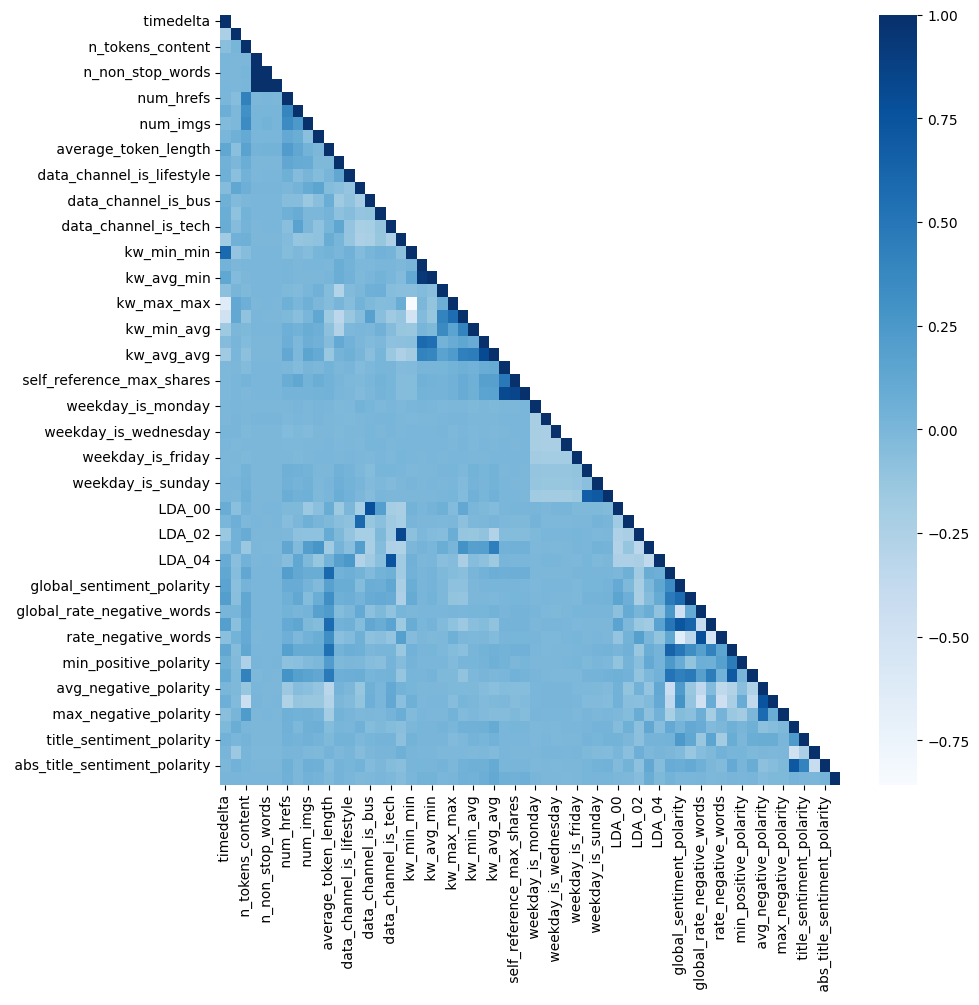

In [6]:
import seaborn as sns
cor=dataFrame.corr()
plt.figure(figsize=(10,10))
df_lt = cor.where(np.tril(np.ones(cor.shape)).astype(np.bool))
sns.heatmap(df_lt,cmap='Blues')

A partir de la matriz de correlación podemos ver que la etiqueta 'n_non_stop_words' y 'n_non_stop_unique_tokens' tienen una correlación muy fuerte con la etiqueta 'n_unique_tokens' por lo que si no aportan información extra podrían ser candidatas a eliminarse ya que lo unico que aportan es ruido.

Yo en mi caso personal he optado por quitarlas debido a que el valor que puedo visualizar en la matriz de correlación es de 1, el máximo por lo que decido quitarlas del problema.

In [7]:
candidatas_eliminar = [' n_non_stop_words', ' n_non_stop_unique_tokens']
dataFrame = dataFrame.drop(candidatas_eliminar, axis = 1)

Para explorar las variables como he mencionado anteriomente para ver que distribución tienen, si son o no categóricas y asi ver lo que he inferido a partir de analizar las variables es correcto voy a proceder a visualizar la distribución de cada una de las variables

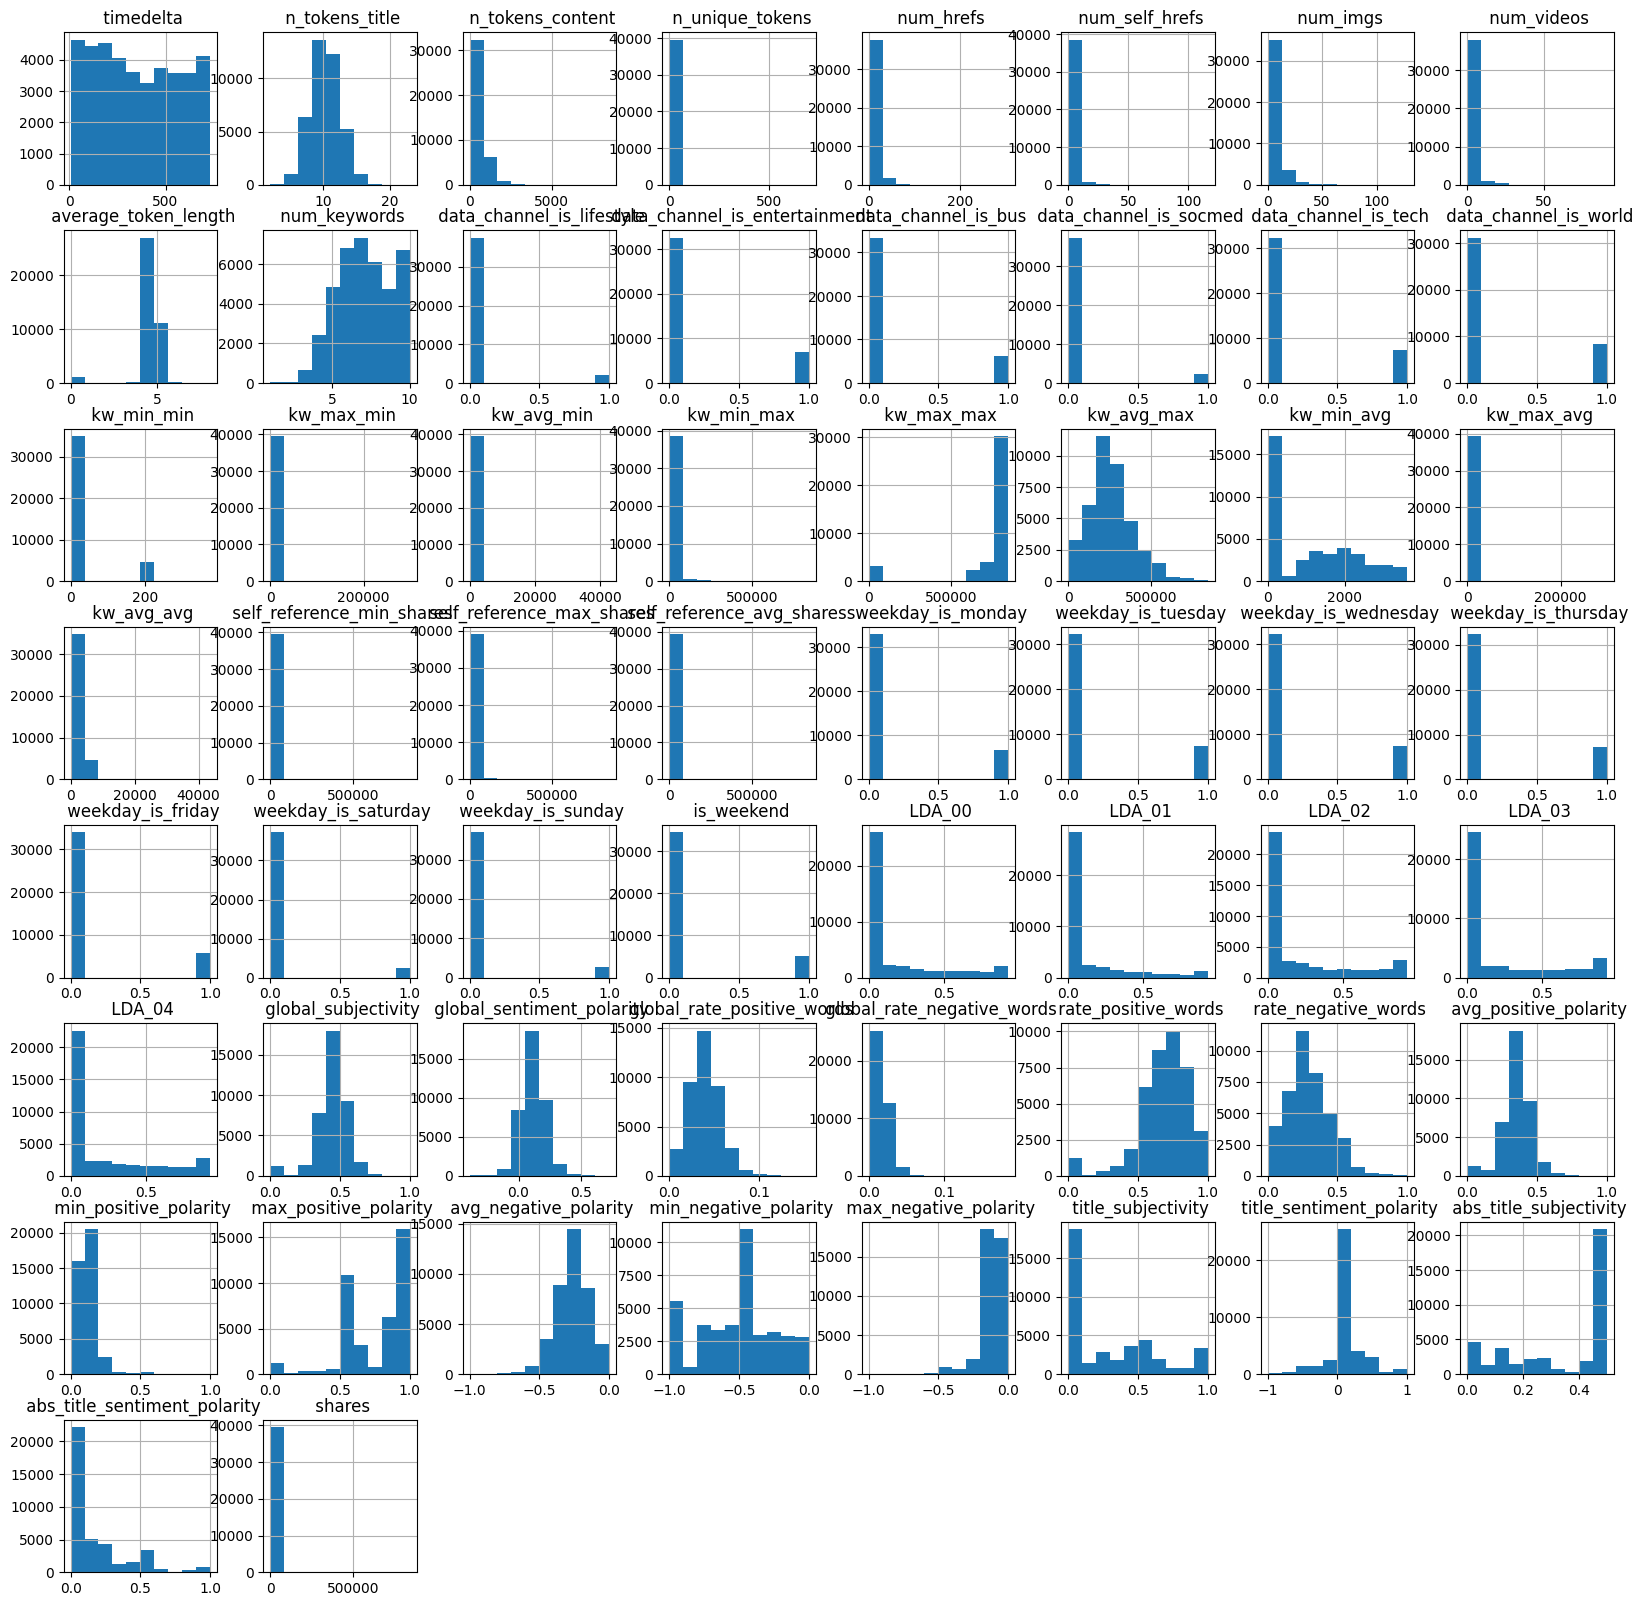

In [8]:
dataFrame.hist(figsize=(20,20))
plt.show()

A partir de ver la distribución anterior podemos ver que hay varibles que claramente tienen valores entre 0 y 1 y no intermedios como podrian ser todas las variables que comienzan por 'weekday_is' y 'data_channel_is' que investigando sobre lo que son podemos ver claramente que son variables categóricas binarias. Esto debemos de tenerlo en cuenta ya que en un futuro si operamos con pca no debemos de aplicarlo sobre este tipo de variables al igual que una normalización.
Tambien podríamos pensar segun lo mencionado anteriormente que 'shares' pueda ser binaria ya que se ve que solo tiene valores en 0 pero no nos podemos dejar llevar de esa manera ya que en el eje x sus valores se mueven en un rango que no es 0 , 1 o algun tipo de categoría. Además es la etiqueta objetivo y estamos tratando con un problema de regresión no tendría sentido que lo fuese.

In [9]:
#Al intentar acceder a las variables me doy cuenta que hay columnas que tienen un espacio antes de la palabra tal que ' shares' por lo que elimino ese espacio
dataFrame.columns=dataFrame.columns.str.replace(" ","")

Explorando cada una de las variables encontré que había datos sobre páginas que no tienen palabras en el contenido lo que me hace pensar que es un error por ello en mi caso voy a ver como influye esta variable con respecto de la variable target para ver la distribución y ver si es bueno eliminarlas o no

In [10]:
dataFrame[dataFrame['n_tokens_content'] == 0]
#dataFrame = dataFrame[dataFrame['n_tokens_content'] != 0]

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
893,http://mashable.com/2013/01/23/actual-facebook...,715.0,10.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.550000,-0.500000,0.050000,0.500000,2500
917,http://mashable.com/2013/01/23/fitness-gadget-...,715.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.500000,0.000000,1700
1062,http://mashable.com/2013/01/25/data-vs-nature-...,713.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.500000,0.000000,4500
1121,http://mashable.com/2013/01/26/infographics-ma...,712.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.066667,0.033333,0.433333,0.033333,6800
1312,http://mashable.com/2013/01/29/social-tv-chart...,709.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.283333,0.266667,0.216667,0.266667,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39598,http://mashable.com/2014/12/26/holiday-decorat...,9.0,11.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.333333,0.250000,0.166667,0.250000,6100
39601,http://mashable.com/2014/12/26/minority-author...,9.0,12.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.625000,0.400000,0.125000,0.400000,2300
39613,http://mashable.com/2014/12/26/the-interview-b...,9.0,12.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.500000,0.000000,1600
39615,http://mashable.com/2014/12/26/toothpaste-fluo...,9.0,11.0,0.0,0.0,0.0,0.0,21.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.454545,0.136364,0.045455,0.136364,5700


Text(0.5, 1.0, 'Shares en funcion de n_tokens_content')

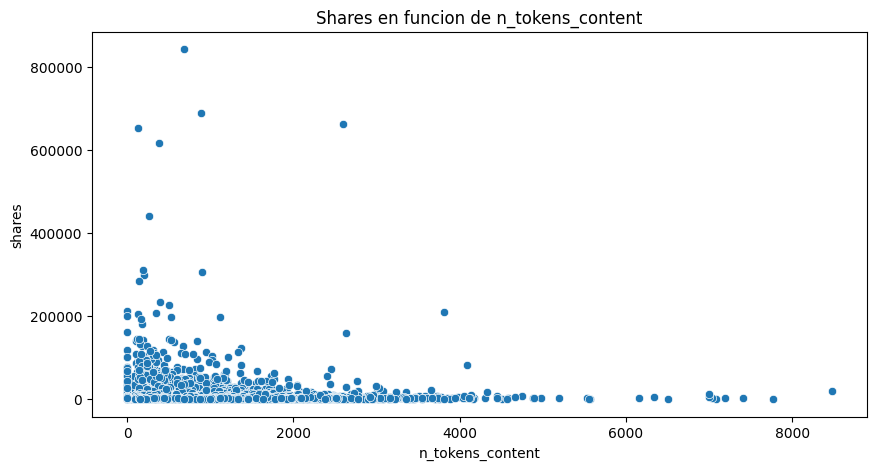

In [11]:
plt.figure(figsize=(10,5))
ax = sns.scatterplot(y='shares', x='n_tokens_content', data=dataFrame)
plt.title("Shares en funcion de n_tokens_content")

Debido a que la mayoria de las noticias tienden a tener menos n_tokens_content voy a optar por seguir manteniendo aquellas que no tienen ya que sería dudoso quitarlas simplemente por el hecho de ser como son. (Puede haber noticias de arte que solo sean imagenes)

Ahora voy a guardar que variables son de tipo categóricas y cuales de tipo numéricas para que de cara al futuro pueda operar con ellas de una forma más sencilla.

In [12]:
columns_binary = ['weekday_is_monday','weekday_is_tuesday','weekday_is_wednesday','weekday_is_thursday',
             'weekday_is_friday','weekday_is_saturday','weekday_is_sunday','is_weekend',            
             'data_channel_is_lifestyle','data_channel_is_entertainment','data_channel_is_bus',
                  'data_channel_is_socmed','data_channel_is_tech','data_channel_is_world']
                  
columns_numericas = []
for column in dataFrame.columns[2:-1]:
  if column not in columns_binary:
    columns_numericas.append(column)


#### <font color='blue'>2)  Identificar qué conjuntos de hipótesis se emplearán y justificar dicha elección. 0.25 puntos. 

La elección de utilizar la clase LinearModel y SGDRegressor viene por lo siguiente:

Simplicidad y velocidad: La clase LinearModel y SGDRegressor proporcionan implementaciones simples y eficientes de modelos lineales para la regresión. Estos modelos son relativamente rápidos de entrenar y aplicar en comparación con otros algoritmos más complejos, lo que puede ser beneficioso en situaciones donde el tiempo de entrenamiento y la velocidad de predicción son factores importantes.

Escalabilidad: SGDRegressor es un modelo lineal que utiliza el algoritmo de descenso de gradiente estocástico (SGD), que es especialmente útil para problemas con grandes conjuntos de datos.

Flexibilidad y regularización: Tanto LinearModel como SGDRegressor permiten la incorporación de técnicas de regularización, como la regularización L1 (Lasso) y L2 (Ridge). La regularización puede ayudar a evitar el sobreajuste y mejorar la generalización del modelo. Estas clases también permiten la especificación de otros hiperparámetros relevantes, como la tasa de aprendizaje en SGDRegressor, lo que brinda flexibilidad adicional para ajustar el modelo a las características específicas del problema.

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor

#### <font color='blue'>3)  Si la base de datos define conjuntos de training y test, únalos en un solo conjunto y genere sus propios conjuntos. Describa y justifique el mecanismo de partición. 0.75 puntos. 

Informandome y mirando veo que no hay una regla que diga que tamaño es mejor o peor para tomar dividir los datos en train y test pero lo que si he visto es que lo que más se hace es dividirlo en ratios de 80-20 y 70-30 que suelen ser los que mejor funcionan.

Aún así en numerosos articulos de machine learning se opta por una division de la siguiente forma para cross validation donde el 15% es el tamaño del test y el resto train 85% que a su vez cuando lo hagamos en una validacion cruzada tendremos un tamaño de test_val cercano al 15%. (85/5)

Para la division del conjunto de datos en train y test usaré la funcion de sklearn train_test_split que recibe en primer lugar lo que será nuestra X, después la Y, como parametro el test size para ver en que cantidad vamos a dividir el conjunto (en nuestro caso será 0.15 para que el test sea el 15%) y el random_state que será la semilla.

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( dataFrame[dataFrame.columns[2:-1]], dataFrame[dataFrame.columns[-1]], test_size=0.15, random_state=0)

In [15]:
#values = y_train[y_train >  1.806360e+04].index
#X_train = X_train.drop(values)
#y_train = y_train[y_train <=  1.806360e+04]

Una vez partidos los conjuntos lo que haremos será sencillamente usar cross validation para ver el desempeño de los modelos elegidos. El uso justificado de usar cross validation es por lo siguiente:

En primer lugar nos brinda una estimación más precisa del rendimiento del modelo, la validación cruzada permite obtener una estimación más precisa del rendimiento del modelo al evaluarlo en múltiples divisiones diferentes del conjunto de datos. En lugar de depender de una única división de entrenamiento/prueba, la validación cruzada divide el conjunto de datos en k partes (k-folds) y realiza k iteraciones, utilizando cada parte como conjunto de prueba una vez y el resto como conjunto de entrenamiento. Esto ayuda a reducir la variabilidad de la estimación del rendimiento y proporciona una evaluación más robusta y confiable del modelo.

Además nos ayuda con la detección de sobreajuste (overfitting). La validación cruzada ayuda a identificar si un modelo está sobreajustando o subajustando los datos. Si el modelo tiene un rendimiento alto en el conjunto de entrenamiento pero un rendimiento deficiente en el conjunto de prueba, esto puede ser indicativo de sobreajuste. La validación cruzada permite detectar estos problemas de generalización temprano y tomar medidas para abordarlos, como ajustar los hiperparámetros del modelo o utilizar técnicas de regularización.

También sirve para ayudarnos a la hora de la selección de modelos y su comparación debido a que la validación cruzada permite comparar diferentes modelos y seleccionar el más adecuado para el problema en cuestión. Al realizar la validación cruzada en varios modelos con diferentes configuraciones o algoritmos, se puede comparar su rendimiento de manera más justa y objetiva. Esto ayuda a tomar decisiones informadas sobre qué modelo utilizar y cómo ajustarlo para obtener mejores resultados.

#### <font color='blue'>4)  Justifique todos los detalles del preprocesado de los datos (codificación, transformación, normalización, etc). Es decir, todas las manipulaciones sobre los datos iniciales que nos permitan fijar el conjunto de vectores de características que se usarán en el entrenamiento. 1 punto.  

<font color='blue'>Nota: Las transformaciones no-lineales de las variables pueden definirse a partir de las potencias y
productos de potencias de las variables originales, conjuntos de polinomios ortogonales, etc. Si se
usan transformaciones no polinómicas de las variable como $log$, $\sqrt{()}$, $sin$, etc, debe justificar el
interés de las mismas. 

En primer lugar y antes de nada vamos a hacer una transformación de la etiqueta objetivo debido a que la distribución que mantiene actualmente es dificilmente facil de aprender por lo que cambiando su distribución a través de una función logaritmica y lo que haremos será aprender con esos pesos y después para obtener el error haremos la inversa con una función exponencial para obtener los datos de salida.

In [16]:
y_train_tr = np.log(y_train)
y_test_tr = np.log(y_test)

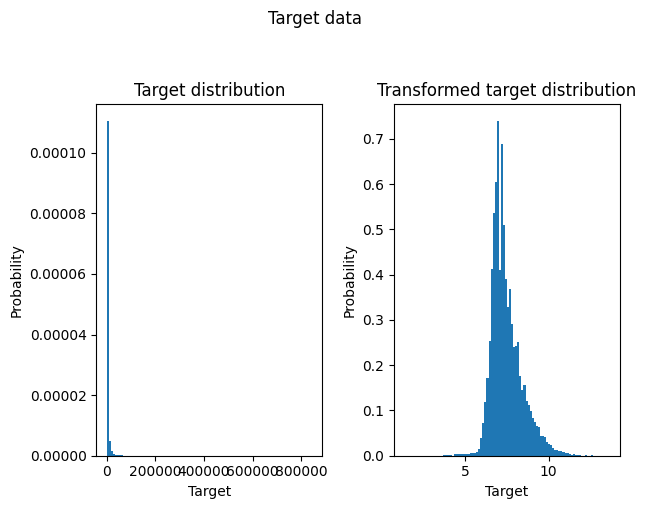

In [17]:
f, (ax0, ax1) = plt.subplots(1, 2)

ax0.hist(y_train, bins=100, density=True)

ax0.set_ylabel("Probability")
#ax0.set_ylim([0, 10])
ax0.set_xlabel("Target")
ax0.set_title("Target distribution")

ax1.hist(y_train_tr, bins=100, density=True)
ax1.set_ylabel("Probability")
ax1.set_xlabel("Target")
ax1.set_title("Transformed target distribution")

f.suptitle("Target data", y=1.05)
plt.tight_layout()

De esta forma podemos ver que la distribucion ahora es diferente y mas sencilla de aprender aparentemente.

Debemos mencionar tambien que no hay datos faltantes como ya hemos comprobado al principio y que todas las variables son variables como vimos también a la hora de hacer el gráfico de las distribuciones.

Con esto quiero decir que no hay datos faltantes y que no hay variables sin variabilidad en el conjunto.

In [18]:
X_train.isnull().sum().head(60)

n_tokens_title                   0
n_tokens_content                 0
n_unique_tokens                  0
num_hrefs                        0
num_self_hrefs                   0
num_imgs                         0
num_videos                       0
average_token_length             0
num_keywords                     0
data_channel_is_lifestyle        0
data_channel_is_entertainment    0
data_channel_is_bus              0
data_channel_is_socmed           0
data_channel_is_tech             0
data_channel_is_world            0
kw_min_min                       0
kw_max_min                       0
kw_avg_min                       0
kw_min_max                       0
kw_max_max                       0
kw_avg_max                       0
kw_min_avg                       0
kw_max_avg                       0
kw_avg_avg                       0
self_reference_min_shares        0
self_reference_max_shares        0
self_reference_avg_sharess       0
weekday_is_monday                0
weekday_is_tuesday  

Ahora lo que vamos a hacer en esta parte es tratar con los posibles outliers que podemos encontrar por cada etiqueta en nuestro problema por lo cual vamos a hacer un box plot para ver en que medida encontramos outliers en cada etiqueta.

También cabe destacar que no siempre tiene por qué ser un outlier aunque se marque como ello.

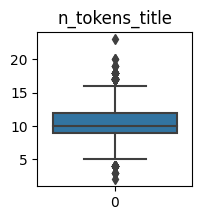

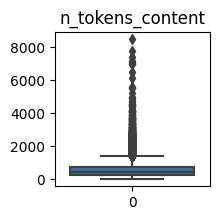

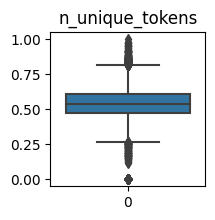

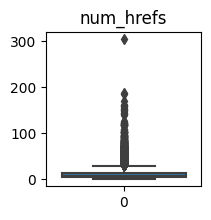

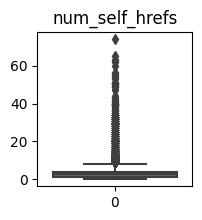

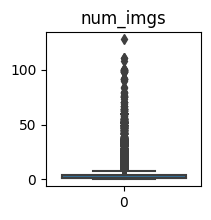

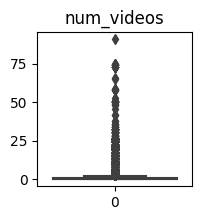

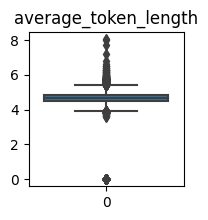

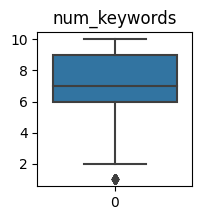

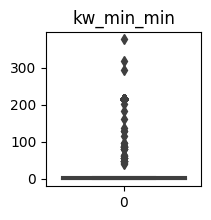

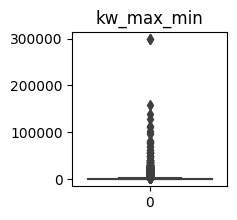

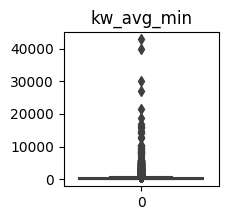

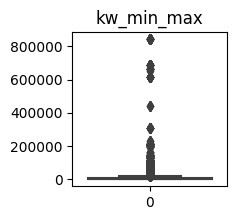

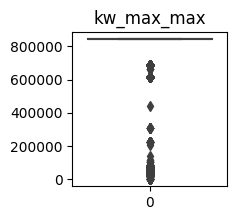

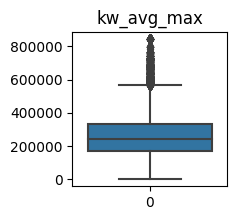

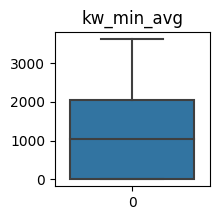

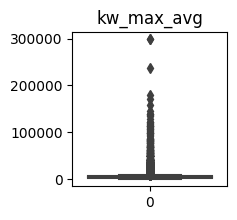

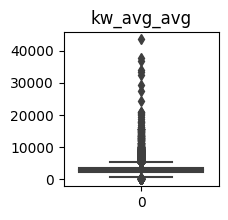

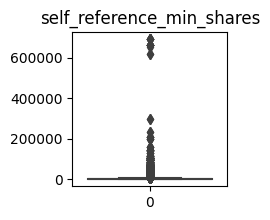

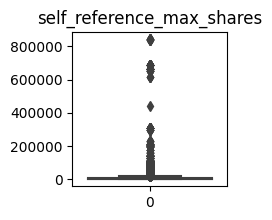

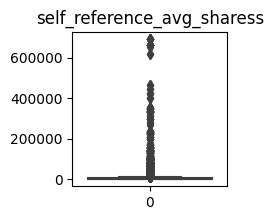

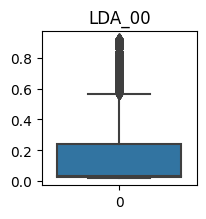

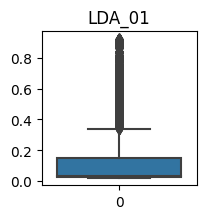

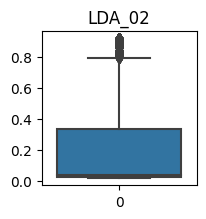

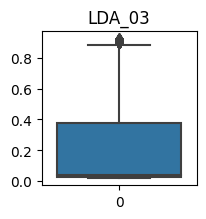

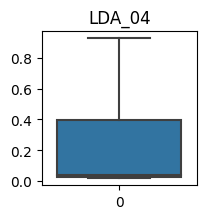

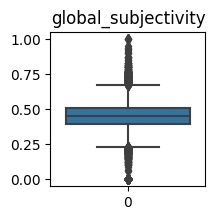

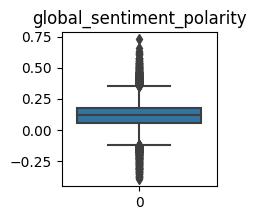

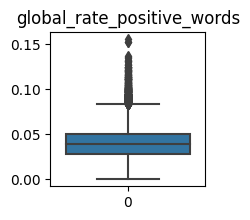

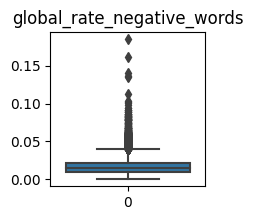

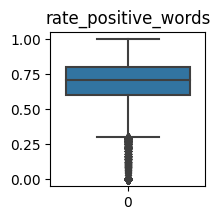

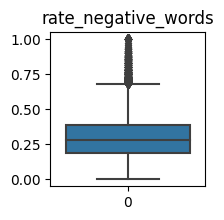

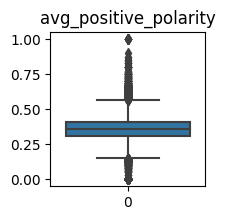

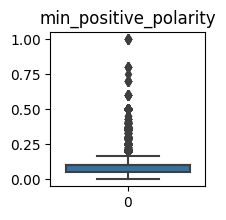

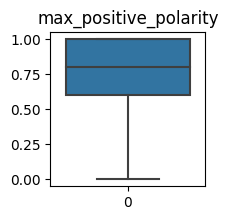

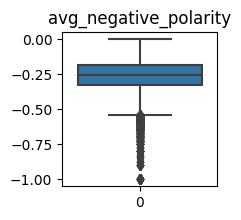

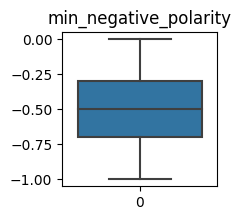

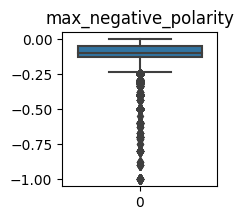

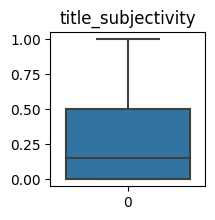

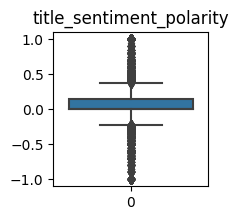

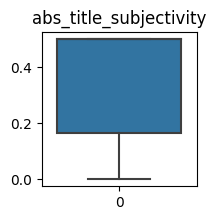

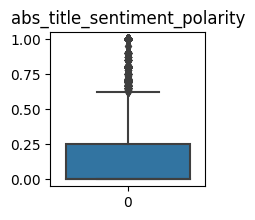

In [19]:
for column in columns_numericas:
    plt.figure(figsize=(2,2))
    sns.boxplot(X_train[column]).set(title=column)
    plt.show()

Debido a la cantidad tan alta de outliers que tenemos lo que haré será aplicar un eliminado de outliers por cuantiles y lo que haré será asignar a cada valor que se salga por encima del valor limite calculado o este por debajo del otro valor límite será aplicarle el valor de la mediana para esa variable. Esto debido a que he probado también con la media pero me ofrece mejores resultados con la mediana.

In [20]:
num_values_cambiados = 0
for column in columns_numericas:    
    q1 = X_train[column].quantile(0.25)    # First Quartile
    q3 = X_train[column].quantile(0.75)    # Third Quartile
    IQR = q3 - q1                            # Inter Quartile Range

    llimit = q1 - 1.5*IQR                       # Lower Limit
    ulimit = q3 + 1.5*IQR                        # Upper Limit

    num_values_cambiados += X_train[(X_train[column] < llimit) | (X_train[column] > ulimit)].shape[0]
    X_train.loc[X_train[(X_train[column] < llimit) | (X_train[column] > ulimit)].index, column] = X_train[column].median()
    X_test.loc[X_test[(X_test[column] < llimit) | (X_test[column] > ulimit)].index, column] = X_train[column].median()
print("Porcentaje de valores cambiados", num_values_cambiados / (X_train.shape[0] * X_train.shape[1]))

Porcentaje de valores cambiados 0.046836513636228747


Ahora aprovechamos con la eliminación de outliers para de nuevo visualizar si este procesado de datos ha sido útil.

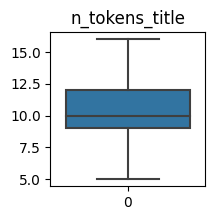

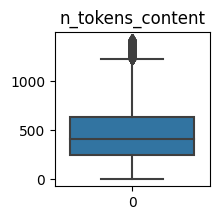

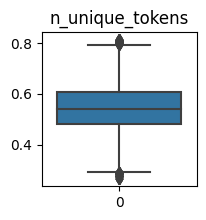

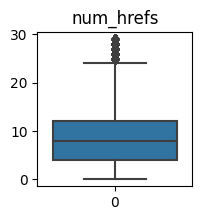

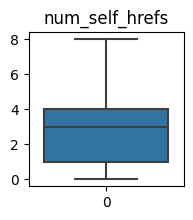

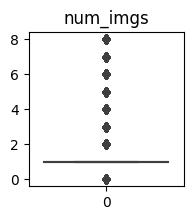

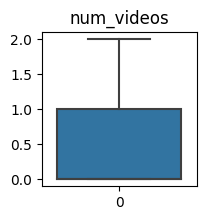

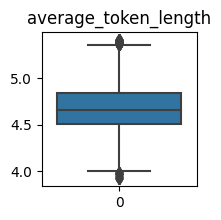

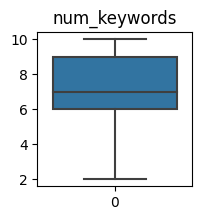

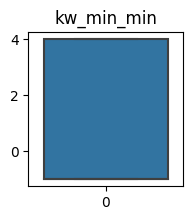

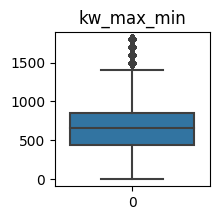

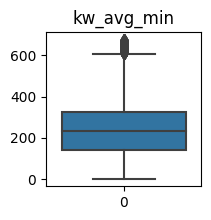

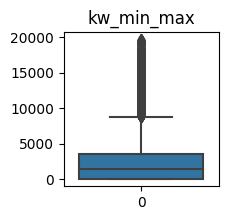

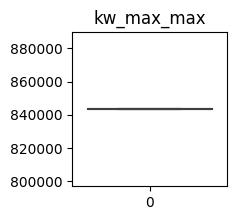

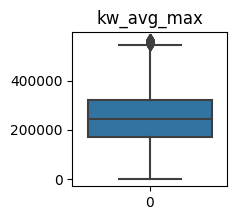

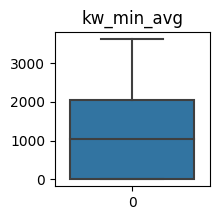

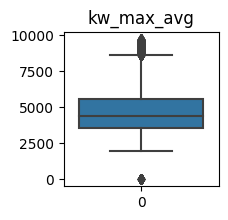

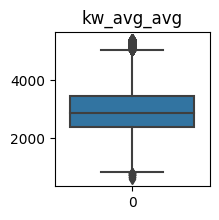

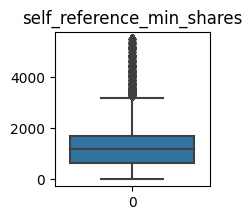

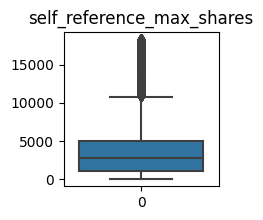

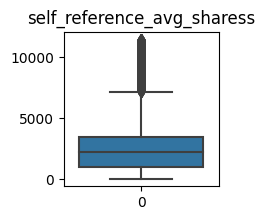

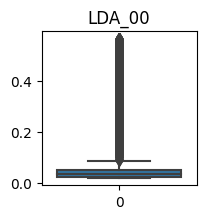

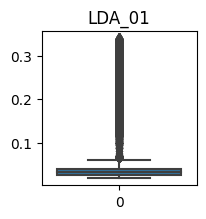

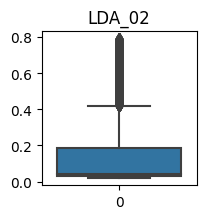

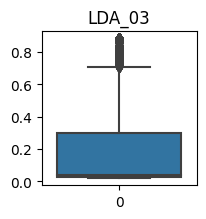

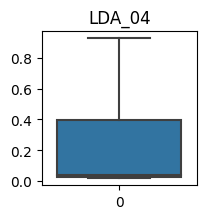

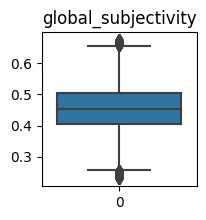

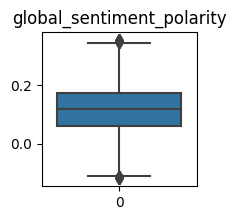

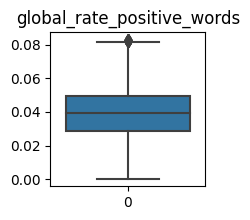

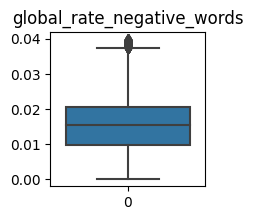

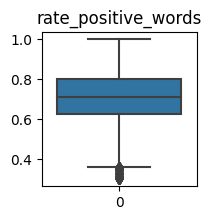

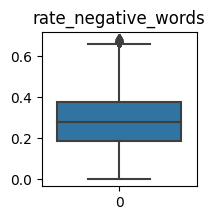

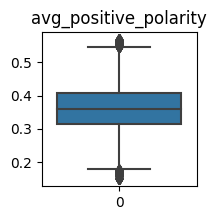

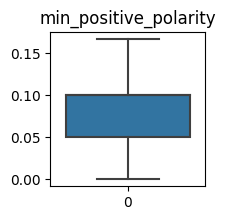

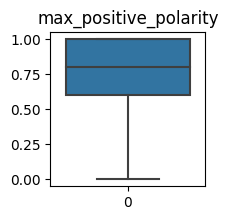

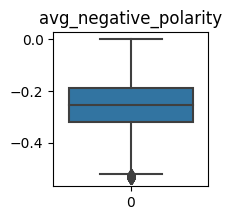

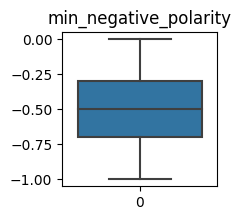

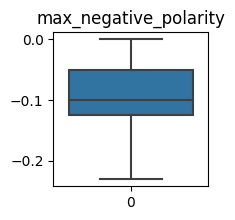

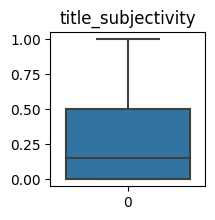

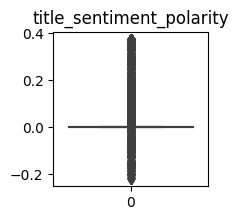

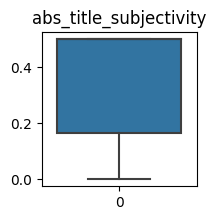

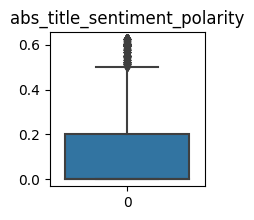

In [21]:
for column in columns_numericas:
    plt.figure(figsize=(2,2))
    sns.boxplot(X_train[column]).set(title=column)
    plt.show()

Como podemos ver hemos conseguido eliminar una cantidad de outliers que mejora los box plot de las etiquetas aunque no ha sido muy agresivo y aún siguen existiendo outliers.

Una vez ya con los outliers quitados lo que vamos a hacer es un escalado robusto, he probado con la normalización min-max y con el escalado que usa media y varianza pero cuando mejores resultados he obtenido ha sido con el escalado robusto. Aún así hay que decir que aplicar una normalización min-max es más agresivo en cuanto a cambios de valores que hacer un escalado y por ello no siempre debiera mejorar. (Según he leído siempre será más elegante aplicar un escalado)

En este caso he escogido el escalado robusto que es una técnica de escalado utilizada en el preprocesamiento de datos para reducir el efecto de los valores atípicos en las variables. Esta técnica es especialmente útil cuando tus datos contienen valores extremos que pueden afectar negativamente el rendimiento de los modelos de regresión.

El RobustScaler transforma las variables de manera que sean más robustas a los valores atípicos. Utiliza la mediana y el rango intercuartil (IQR) en lugar de la media y la desviación estándar, que son más sensibles a los valores atípicos. (No confundir con la eliminación de outliers aunque también pueda ayudar a ello)

Lo que tenemos que hacer es crear una instanciar de este escalador y pasarle en el metodo fit nuestro train set para que calcule la mediana y los cuartiles que usaremos para el escalado y una vez hecho esto realizamos el escalado pasandole nuestro train set y test set en el metodo transform.

In [22]:
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(X_train)
columns = X_train.columns
X_train = pd.DataFrame(transformer.transform(X_train))
X_test = pd.DataFrame(transformer.transform(X_test))
X_train.columns = columns
X_test.columns = columns

Después de realizar el escalado vamos a aplicar PCA para reducir la dimensionalidad de VC y así tener un modelo más sencillo. Esto lo aplicaremos solamente en las variables numéricas ya que no tiene sentido aplicarla en variables categóricas y la reducción la queremos para obtener el 99% de la varianza de la variable objetivo. Lo que hago a continuacion es aplicar PCA sobre train y test pero entrenado con train y luego concateno a esos dataframes las columnas de las variables categóricas

La instacia de PCA la crearemos con el atributo n_components a 0.99 esto es debido a que queremos retener dentro de nuestro dataset el 99% de la información para obtener la variable objetivo y de esta forma reducir la dimensión VC.

Después haremos un fit de PCA con las columnas numéricas de nuestro train set que calculará las componentes principal y las tranformaciones de los datos necesarias para reducir la dimensionalidad. Una vez hecho esto realizaremos la tranformación sobre nuestro train set y data set.

In [23]:
#Aplicamos PCA (no se aplican sobre categoricas o binarias)
from sklearn.decomposition import PCA
pca = PCA(n_components=0.99)
pca.fit(X_train[columns_numericas])
X_train_pca = pca.transform(X_train[columns_numericas])
X_test_pca = pca.transform(X_test[columns_numericas])
# Aplicamos PCA solo a las variables numericas y una vez hecho esto lo pasamos a dataframe y le concatenamos las variables binarias
X_train_pca = pd.DataFrame(X_train_pca)
X_train_pca = X_train_pca.reset_index(drop = True)
X_test_pca = pd.DataFrame(X_test_pca)
X_test_pca = X_test_pca.reset_index(drop = True)
binary_Tr =  X_train[columns_binary]
binary_Tr = binary_Tr.reset_index(drop = True)
binary_Te =  X_test[columns_binary]
binary_Te = binary_Te.reset_index(drop = True)

X_train_pca = pd.concat([X_train_pca, binary_Tr], axis=1)
X_test_pca = pd.concat([X_test_pca, binary_Te], axis=1)

X_train_pca.columns = X_train_pca.columns.astype(str)
X_test_pca.columns = X_test_pca.columns.astype(str)  

#### <font color='blue'>5)  Justifique las métricas de error y la función de pérdida a usar. Discutir su idoneidad para el problema. 0.5 puntos. 

Las métricas de error que usaremos serán:

Error Cuadrático Medio (MSE, Mean Squared Error): El MSE es una métrica comúnmente utilizada en problemas de regresión. Calcula la media de las diferencias al cuadrado entre los valores predichos y los valores reales. El MSE penaliza los errores grandes más que los errores pequeños debido al cuadrado de las diferencias. Una puntuación de MSE más baja indica un mejor ajuste del modelo a los datos.

Error Absoluto Medio (MAE, Mean Absolute Error): El MAE es otra métrica utilizada en problemas de regresión. Calcula la media de las diferencias absolutas entre los valores predichos y los valores reales. A diferencia del MSE, el MAE no penaliza los errores grandes más que los errores pequeños. Una puntuación de MAE más baja también indica un mejor ajuste del modelo a los datos.

En resumen, el MSE y el MAE miden la discrepancia entre los valores predichos y los valores reales en problemas de regresión. El MSE penaliza los errores grandes más que el MAE debido al cuadrado de las diferencias, mientras que el MAE trata todos los errores por igual. Ambas métricas se utilizan para evaluar el rendimiento del modelo de regresión, y el objetivo es minimizar tanto el MSE como el MAE para lograr el mejor ajuste del modelo a los datos.

La métrica R2, también conocida como coeficiente de determinación, es una medida comúnmente utilizada para evaluar el rendimiento de un modelo de regresión. R2 proporciona una medida de qué tan bien se ajustan los valores predichos por el modelo a los valores reales del conjunto de datos. Toma valores entre 0 y 1, donde 0 indica que el modelo no puede explicar la variabilidad de los datos y 1 indica que el modelo explica perfectamente la variabilidad de los datos. Un valor de R2 cercano a 1 indica un buen ajuste del modelo, mientras que un valor cercano a 0 indica un mal ajuste. Cabe destacar que tiene limitaciones y no es una métrica adecuada en todos los casos. Por ejemplo, en modelos no lineales o cuando hay dependencias complejas en los datos, R2 puede no proporcionar una evaluación adecuada del rendimiento del modelo. 

Las funciones de perdida que que usaremos en nuestros modelos son:
 
* En el modelo lineal que incorporamos de la librería sklearn la función de perdida es la raiz del error cuadrático medio (RMSE)

* En el modelo lineal que se optimiza con SGD (SGDRegressor) la función de pérdida que utilizaré será 'huber' esta se especifica a la hora de crear una instancia del modelo y por lo que la elijo es porque es una función de pérdida robusta que combina las características de las funciones de pérdida de error cuadrático medio (MSE) y error absoluto medio (MAE).
La función de pérdida huber está diseñada para ser menos sensible a los valores atípicos en comparación con la función de pérdida MSE. Su objetivo es minimizar el efecto de los valores extremos en el ajuste del modelo de regresión.







#### <font color='blue'>6)  Discuta todos los parámetros y el tipo de regularización usada en el ajuste de los modelos seleccionados. Justificar la idoneidad de la regularización elegida. 1 punto. 

In [24]:
# METODO PARA LA CROSS VALIDATION HECHO POR MI MISMO
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import r2_score as R2
import math

#Rangos que utilizo para los boxplot que muestro
a = np.arange(y_train.min(), y_train.max(), (y_train.max() - y_train.min())/ 10)

def own_cv(X_train, y_train, model):
  index = 1
  msas_trs = []
  mses_trs = []
  msas_tes = []
  mses_tes = []
  r2_trs = []
  r2_tes = []

  errors = []
  for i in range(len(a)-1):
    errors.append([])
  
  # Uso KFold para dividir los datos en 5 y de esta forma obtener los indices tanto para la parte que usaremos
  # para entrenar como para los indices de la parte que usaremos como test
  

  kf = KFold(n_splits=5, shuffle=True, random_state=42)
  for train_index, test_index in kf.split(X_train, y_train):
      
      x_train_fold, x_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
      y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
      if 'MEAN' not in model[0]:
        model[1].fit(x_train_fold, y_train_fold)

        y_pred = np.exp(model[1].predict(x_train_fold))
        y_pred_test = np.exp(model[1].predict(x_test_fold))
        
        msas_trs.append(MAE(np.exp(y_train_fold), y_pred))
        mses_trs.append(MSE(np.exp(y_train_fold), y_pred, squared = False))
        r2_trs.append(R2(np.exp(y_train_fold), y_pred))

        msas_tes.append(MAE(np.exp(y_test_fold), y_pred_test))
        mses_tes.append(MSE(np.exp(y_test_fold), y_pred_test, squared = False))
        r2_tes.append(R2(np.exp(y_test_fold), y_pred_test))

        y_test_fold = np.exp(y_test_fold)

        for i in range(len(y_pred_test)):
          #print(y_test_fold.iloc[i])
          if y_test_fold.iloc[i] <= a[1] and y_test_fold.iloc[i] > a[0]:
            errors[0].append((y_pred_test[i] - y_test_fold.iloc[i])**2)
          elif y_test_fold.iloc[i] <= a[2] and y_test_fold.iloc[i] > a[1]:
            errors[1].append((y_pred_test[i] - y_test_fold.iloc[i])**2)
          elif y_test_fold.iloc[i] <= a[3] and y_test_fold.iloc[i] > a[2]:
            errors[2].append((y_pred_test[i] - y_test_fold.iloc[i])**2)
          elif y_test_fold.iloc[i] <= a[4] and y_test_fold.iloc[i] > a[3]:
            errors[3].append((y_pred_test[i] - y_test_fold.iloc[i])**2)
          elif y_test_fold.iloc[i] <= a[5] and y_test_fold.iloc[i] > a[4]:
            errors[4].append((y_pred_test[i] - y_test_fold.iloc[i])**2)
          elif y_test_fold.iloc[i] <= a[6] and y_test_fold.iloc[i] > a[5]:
            errors[5].append((y_pred_test[i] - y_test_fold.iloc[i])**2)
          elif y_test_fold.iloc[i] <= a[7] and y_test_fold.iloc[i] > a[6]:
            errors[6].append((y_pred_test[i] - y_test_fold.iloc[i])**2)
          elif y_test_fold.iloc[i] <= a[8] and y_test_fold.iloc[i] > a[7]:
            errors[7].append((y_pred_test[i] - y_test_fold.iloc[i])**2)
          elif y_test_fold.iloc[i] <= a[9] and y_test_fold.iloc[i] > a[8]:
            errors[8].append((y_pred_test[i] - y_test_fold.iloc[i])**2)

      elif 'MEAN' in model[0]:

        y_pred = np.exp(np.full(x_train_fold.shape[0], y_train_fold.mean()))
        y_pred_test = np.exp(np.full(x_test_fold.shape[0], y_train_fold.mean()))

        msas_trs.append(MAE(np.exp(y_train_fold), y_pred))
        mses_trs.append(MSE(np.exp(y_train_fold), y_pred, squared = False))
        r2_trs.append(R2(np.exp(y_train_fold), y_pred))

        msas_tes.append(MAE(np.exp(y_test_fold), y_pred_test))
        mses_tes.append(MSE(np.exp(y_test_fold), y_pred_test, squared = False))
        r2_tes.append(R2(np.exp(y_test_fold), y_pred_test))

        y_test_fold = np.exp(y_test_fold)

        for i in range(len(y_pred_test)):
          #print(y_test_fold.iloc[i])
          if y_test_fold.iloc[i] <= a[1] and y_test_fold.iloc[i] > a[0]:
            errors[0].append((y_pred_test[i] - y_test_fold.iloc[i])**2)
          elif y_test_fold.iloc[i] <= a[2] and y_test_fold.iloc[i] > a[1]:
            errors[1].append((y_pred_test[i] - y_test_fold.iloc[i])**2)
          elif y_test_fold.iloc[i] <= a[3] and y_test_fold.iloc[i] > a[2]:
            errors[2].append((y_pred_test[i] - y_test_fold.iloc[i])**2)
          elif y_test_fold.iloc[i] <= a[4] and y_test_fold.iloc[i] > a[3]:
            errors[3].append((y_pred_test[i] - y_test_fold.iloc[i])**2)
          elif y_test_fold.iloc[i] <= a[5] and y_test_fold.iloc[i] > a[4]:
            errors[4].append((y_pred_test[i] - y_test_fold.iloc[i])**2)
          elif y_test_fold.iloc[i] <= a[6] and y_test_fold.iloc[i] > a[5]:
            errors[5].append((y_pred_test[i] - y_test_fold.iloc[i])**2)
          elif y_test_fold.iloc[i] <= a[7] and y_test_fold.iloc[i] > a[6]:
            errors[6].append((y_pred_test[i] - y_test_fold.iloc[i])**2)
          elif y_test_fold.iloc[i] <= a[8] and y_test_fold.iloc[i] > a[7]:
            errors[7].append((y_pred_test[i] - y_test_fold.iloc[i])**2)
          elif y_test_fold.iloc[i] <= a[9] and y_test_fold.iloc[i] > a[8]:
            errors[8].append((y_pred_test[i] - y_test_fold.iloc[i])**2)

      index += 1

  for i in range(len(errors)):
    print("Media en " + str(i) + " intervalo:" + str(np.array(errors[i]).mean()))

  fig = plt.figure(figsize =(6, 3))
  plt.xlabel("Intervalos")
  ax = fig.add_axes([0, 0, 1, 1])
  ax.set_title("Errores en prediccion por intervalos")
  bp = ax.boxplot(errors)
  plt.xticks(range(len(a)), a)
  plt.show()
  
  print("MAE TRAIN: ", np.array(msas_trs).mean())
  print("MSE TRAIN: ", np.array(mses_trs).mean())
  print("R2 TRAIN: ", np.array(r2_trs).mean())
  print("MAE TEST: ", np.array(msas_tes).mean())
  print("MSE TEST: ", np.array(mses_tes).mean())
  print("R2 TEST: ", np.array(r2_tes).mean())
  return msas_trs, mses_trs, r2_trs, msas_tes, mses_tes, r2_tes



Modelo Lineal: para este modelo no he aplicado ningun parámetro ni ningún tipo de regularización. Mi objetivo con este modelo es simplemente ver el desempeño que puede tener un modelo sencillo en un conjunto de datos como el que tenemos.
Pode defecto los parametros que tiene son:
1. Fit_intercept (default True): Especifica si se debe calcular o no la intersección (también conocida como "intercepto" o "término independiente") en el modelo de regresión lineal.
La intersección se refiere al valor de la variable dependiente cuando todas las variables independientes son iguales a cero.
2. X_copy (default True): Indica si el conjunto de datos X se hará una copia para que este no sea sobreescrito. 
3. N_jobs (default None): El número de trabajos a utilizar para el cálculo. Esto solo proporcionará una aceleración en caso de problemas lo suficientemente grandes.
4. Positive (default False): Restringe los valores de los pesos a ser positivos.

SGDRegressor: los parámetros utilizamos para este modelo son los siguientes:
1. Alpha: es la constante que multiplica el termino de regularización por lo que cuanto más grande es mayor es el termino de regularización que se aplica. En nuestro caso también entra en juego debido a que el learning_rate que he escogido es 'optimal'
2. Max_iter: es el número de iteraciones máximas que realizará nuestro modelo antes de parar.
3. Loss: en este parámetro lo que hacemos es especificar la función de perdida que usará este modelo. Hay distintos tipos como 'squared_error' y el que yo he elegido 'huber' (explicado en punto 5)
4. Learning_rate: este es el valor que tomará el sgd como learning_rate, tenemos distintas opciones como hacerlo constante, que sea adaptativo o la que yo he elegido 'optimal' en la que el learning rate es dado el valor (1.0 / (alpha * (t + t0))) donde t0 se escoge a partir de una heurística propuesta por Lean Bottou. Para ver el transfondo de mi elección de este learning rate podemos recordar que el learning rate es un hiperparámetro que determina la velocidad a la que el algoritmo SGD ajusta los coeficientes del modelo en función del gradiente de la función de pérdida. Un learning rate demasiado bajo puede hacer que el modelo converja lentamente y requiera más iteraciones para alcanzar una solución óptima. Por otro lado, un learning rate demasiado alto puede hacer que el algoritmo diverja o salte entre soluciones subóptimas por lo que usando este learning rate óptimo nos implica un equilibrio entre la convergencia rápida y la estabilidad del algoritmo. 

Ahora parámetros que no he todaco en SGDRegressor y siguen por defecto:
1. Penalty (default l2): se utiliza para especificar la función de regularización a aplicar durante la optimización del modelo de regresión (Más adelante explico que es la regularizacion L2)
2. l1_ratio (default 0.15): es un valor que controla la combinación entre las regularizaciones L1 (valor absoluto) y L2 (cuadrado) en el algoritmo de descenso de gradiente estocástico (SGD).
3. fit_intercept (default True): Especifica si se debe calcular o no la intersección en el modelo de regresión lineal.
4. tol (default 1e-3): se utiliza para especificar la tolerancia del criterio de parada durante la optimización del modelo utilizando el algoritmo de descenso de gradiente estocástico (SGD).
5. shuffle (default True): Este parámetro controla si se deben mezclar los datos en cada iteración durante el entrenamiento. 
6. verbose (default 0): controla el nivel de detalle de los mensajes de progreso durante el entrenamiento. Un valor mayor que 0 imprimirá mensajes más detallados, mientras que 0 no imprimirá ningún mensaje durante el entrenamiento.
7. epsilon (default 0.1): es la constante de tolerancia para la pérdida insensible a la pérdida de Huber. 
8. eta0 (default 0.01): es la tasa de aprendizaje inicial. Determina el tamaño del paso que se toma en cada iteración durante el descenso de gradiente estocástico.
9. power_t (default 0.25): es la potencia inversa para la tasa de aprendizaje. Controla la disminución de la tasa de aprendizaje a medida que avanza el entrenamiento.
10. early_stopping (default False): controla si se debe utilizar la detención anticipada (early stopping).
11. validation_fraction (default 0.1): parámetro especifica la proporción de datos que se utilizarán como conjunto de validación si se habilita early_stopping.
12. n_iter_no_change (default 5): especifica el número máximo de iteraciones consecutivas sin mejora en la función de pérdida en el conjunto de validación antes de que se detenga.
13. warm_start (default False): controla si se deben reutilizar los coeficientes anteriores como punto de partida para el siguiente fit llamado. Si se establece en True, permite un entrenamiento incremental del modelo.
14. average (default False): controla si se deben utilizar los coeficientes promediados durante el entrenamiento en lugar de los coeficientes finales.

SGDRegressor aplica la L2 regularización, también conocida como Ridge regularization o Tikhonov regularization, es una técnica utilizada en el aprendizaje automático para controlar el sobreajuste (overfitting) y mejorar la generalización de los modelos de regresión.

La regularización L2 se aplica al agregar un término de penalización a la función de pérdida del modelo, que está relacionado con los valores al cuadrado de los coeficientes de regresión. El término de penalización L2 tiene la forma de la norma L2 de los coeficientes.

La norma L2 de un vector se calcula sumando el cuadrado de cada componente del vector y tomando la raíz cuadrada del resultado. En el contexto de la regularización L2, se suma el cuadrado de cada coeficiente de regresión y se multiplica por un factor de regularización (también conocido como parámetro de penalización o alpha).

El propósito de la regularización L2 es introducir un sesgo en el modelo hacia coeficientes más pequeños. Esto tiene el efecto de reducir la magnitud de los coeficientes y, en consecuencia, reduce la complejidad del modelo, evitando el sobreajuste.

Al ajustar el modelo de regresión con regularización L2, se busca minimizar la siguiente función de pérdida regularizada:

minimize L2 Loss = Sum of Squared Errors + alpha * ||w||^2

Donde:

* Sum of Squared Errors es la función de pérdida original que se quiere minimizar.
* alpha es el factor de regularización que controla la fuerza de la penalización L2.
* ||w||^2 es la norma L2 al cuadrado de los coeficientes de regresión







************  LR   ************
Media en 0 intervalo:31425994.06287831
Media en 1 intervalo:12310118419.467636
Media en 2 intervalo:41610817849.338135
Media en 3 intervalo:87852064810.35492
Media en 4 intervalo:nan
Media en 5 intervalo:192246118825.2962
Media en 6 intervalo:nan
Media en 7 intervalo:412600649247.2539
Media en 8 intervalo:473139129128.88275


<ipython-input-24-20ffcaa7dd32>:109: RuntimeWarning: Mean of empty slice.
  print("Media en " + str(i) + " intervalo:" + str(np.array(errors[i]).mean()))
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


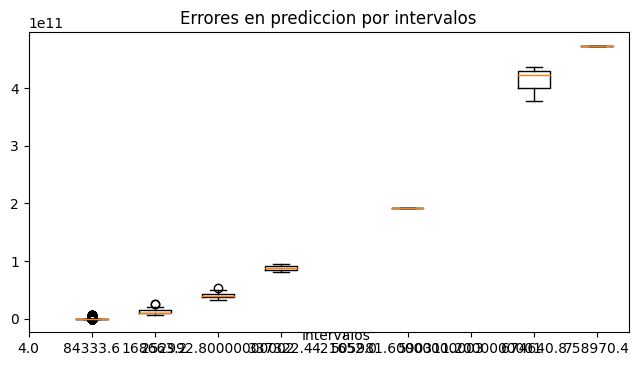

MAE TRAIN:  2403.3900209650283
MSE TRAIN:  12036.389473684463
R2 TRAIN:  -0.007012476501824771
MAE TEST:  2405.568431770572
MSE TEST:  11800.060850073723
R2 TEST:  -0.008519900003444736

************  Modelo MEAN   ************
Media en 0 intervalo:32662957.462605
Media en 1 intervalo:12414398918.778742
Media en 2 intervalo:41826485599.6981
Media en 3 intervalo:87848874698.00697
Media en 4 intervalo:nan
Media en 5 intervalo:192928676430.60577
Media en 6 intervalo:nan
Media en 7 intervalo:413876875645.04144
Media en 8 intervalo:474216256361.2369


<ipython-input-24-20ffcaa7dd32>:109: RuntimeWarning: Mean of empty slice.
  print("Media en " + str(i) + " intervalo:" + str(np.array(errors[i]).mean()))
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


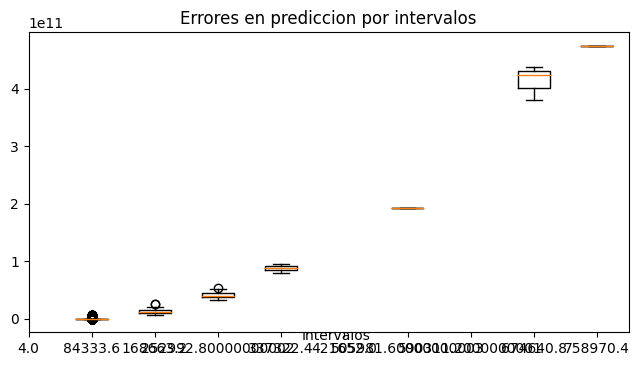

MAE TRAIN:  2490.501147257676
MSE TRAIN:  12105.943974133977
R2 TRAIN:  -0.018737757539203547
MAE TEST:  2490.506900819543
MSE TEST:  11871.648099403052
R2 TEST:  -0.021903670561914536

************  SGD 0.001   ************
Media en 0 intervalo:32632097.51793307
Media en 1 intervalo:12434412331.70431
Media en 2 intervalo:41871582564.14063
Media en 3 intervalo:88083697965.68695
Media en 4 intervalo:nan
Media en 5 intervalo:192571503067.10754
Media en 6 intervalo:nan
Media en 7 intervalo:413130865800.72015
Media en 8 intervalo:473960137829.8721


<ipython-input-24-20ffcaa7dd32>:109: RuntimeWarning: Mean of empty slice.
  print("Media en " + str(i) + " intervalo:" + str(np.array(errors[i]).mean()))
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


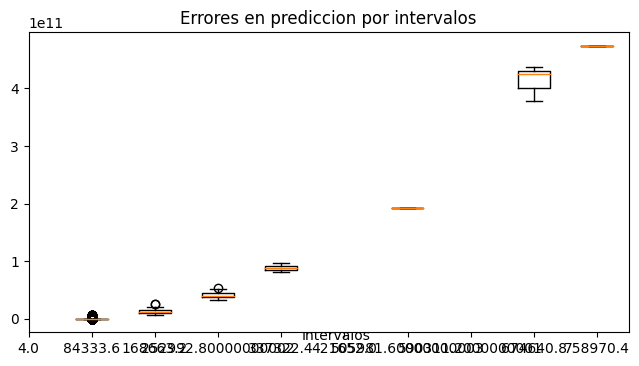

MAE TRAIN:  2380.555021070244
MSE TRAIN:  12105.361316494715
R2 TRAIN:  -0.01862612792372631
MAE TEST:  2383.092751105754
MSE TEST:  11869.947885600792
R2 TEST:  -0.021652660948836777

************  SGD 0.01   ************
Media en 0 intervalo:32663408.5370139
Media en 1 intervalo:12432567490.087763
Media en 2 intervalo:41848126280.44314
Media en 3 intervalo:88031480869.85767
Media en 4 intervalo:nan
Media en 5 intervalo:192810706150.37366
Media en 6 intervalo:nan
Media en 7 intervalo:413538930962.0576
Media en 8 intervalo:473950663407.47784


<ipython-input-24-20ffcaa7dd32>:109: RuntimeWarning: Mean of empty slice.
  print("Media en " + str(i) + " intervalo:" + str(np.array(errors[i]).mean()))
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


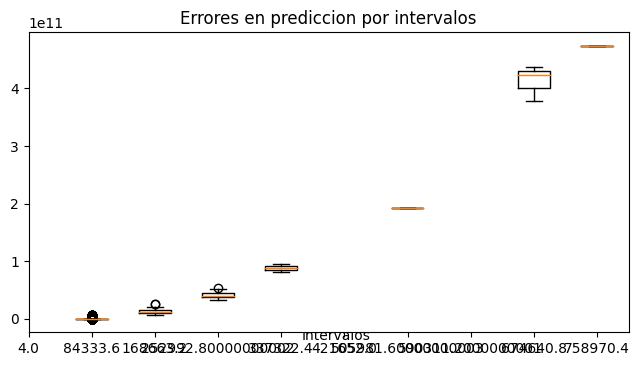

MAE TRAIN:  2377.1803842436957
MSE TRAIN:  12106.194661150666
R2 TRAIN:  -0.018793089659833485
MAE TEST:  2378.640898527539
MSE TEST:  11871.841150533708
R2 TEST:  -0.021906400926117398

************  SGD 0.05   ************
Media en 0 intervalo:32948839.426830452
Media en 1 intervalo:12446002773.993853
Media en 2 intervalo:41872078856.422104
Media en 3 intervalo:88030231903.36143
Media en 4 intervalo:nan
Media en 5 intervalo:192795826337.34393
Media en 6 intervalo:nan
Media en 7 intervalo:413862284944.2303
Media en 8 intervalo:474115053055.8651


<ipython-input-24-20ffcaa7dd32>:109: RuntimeWarning: Mean of empty slice.
  print("Media en " + str(i) + " intervalo:" + str(np.array(errors[i]).mean()))
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


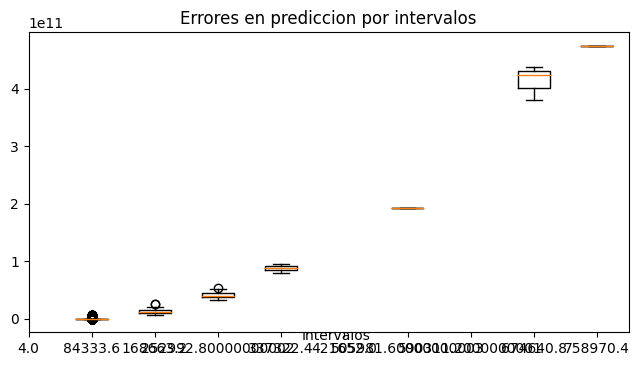

MAE TRAIN:  2392.9479410404206
MSE TRAIN:  12120.269034265863
R2 TRAIN:  -0.021175703314532602
MAE TEST:  2394.139357476194
MSE TEST:  11887.080056043797
R2 TEST:  -0.024805403900024902

************  SGD 0.1   ************
Media en 0 intervalo:33308307.707627352
Media en 1 intervalo:12469896465.058222
Media en 2 intervalo:41918573689.6682
Media en 3 intervalo:88057669200.2918
Media en 4 intervalo:nan
Media en 5 intervalo:192942269897.5435
Media en 6 intervalo:nan
Media en 7 intervalo:414068565500.3972
Media en 8 intervalo:474346217655.9749


<ipython-input-24-20ffcaa7dd32>:109: RuntimeWarning: Mean of empty slice.
  print("Media en " + str(i) + " intervalo:" + str(np.array(errors[i]).mean()))
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


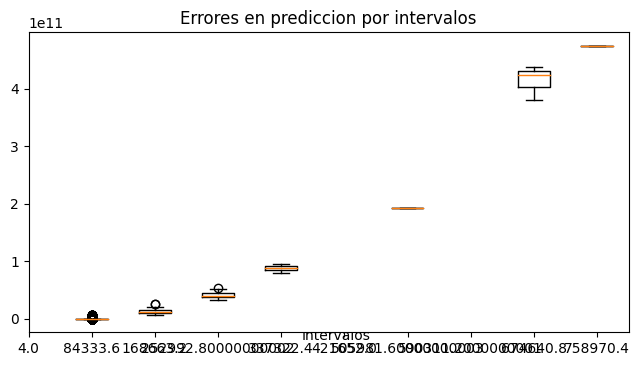

MAE TRAIN:  2406.818742397091
MSE TRAIN:  12138.644482953756
R2 TRAIN:  -0.02429173618094018
MAE TEST:  2407.705329493988
MSE TEST:  11906.454330475488
R2 TEST:  -0.028459792132740434

************  SGD 0.15   ************
Media en 0 intervalo:34345493.177407674
Media en 1 intervalo:12536803634.125101
Media en 2 intervalo:42049882875.53165
Media en 3 intervalo:88183254053.80873
Media en 4 intervalo:nan
Media en 5 intervalo:193308579295.39203
Media en 6 intervalo:nan
Media en 7 intervalo:414493309840.445
Media en 8 intervalo:474802631767.2662


<ipython-input-24-20ffcaa7dd32>:109: RuntimeWarning: Mean of empty slice.
  print("Media en " + str(i) + " intervalo:" + str(np.array(errors[i]).mean()))
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


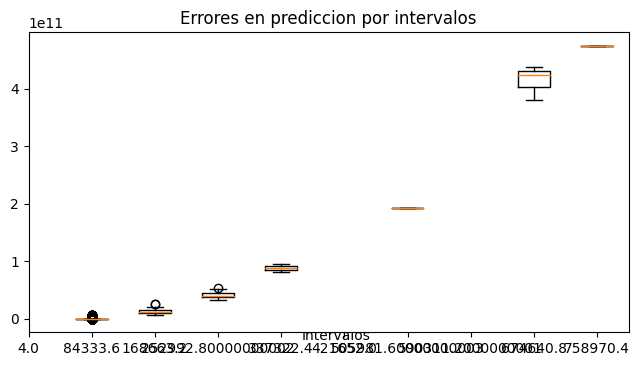

MAE TRAIN:  2458.4402970999176
MSE TRAIN:  12190.43774131383
R2 TRAIN:  -0.0330912870411344
MAE TEST:  2458.9725075091833
MSE TEST:  11961.29900290327
R2 TEST:  -0.038872238432935635

************  SGD 1   ************
Media en 0 intervalo:40282967.058409795
Media en 1 intervalo:12803314951.240835
Media en 2 intervalo:42547039416.78645
Media en 3 intervalo:88895400513.38776
Media en 4 intervalo:nan
Media en 5 intervalo:194477515787.3057
Media en 6 intervalo:nan
Media en 7 intervalo:416142849018.6333
Media en 8 intervalo:476646676807.59924


<ipython-input-24-20ffcaa7dd32>:109: RuntimeWarning: Mean of empty slice.
  print("Media en " + str(i) + " intervalo:" + str(np.array(errors[i]).mean()))
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


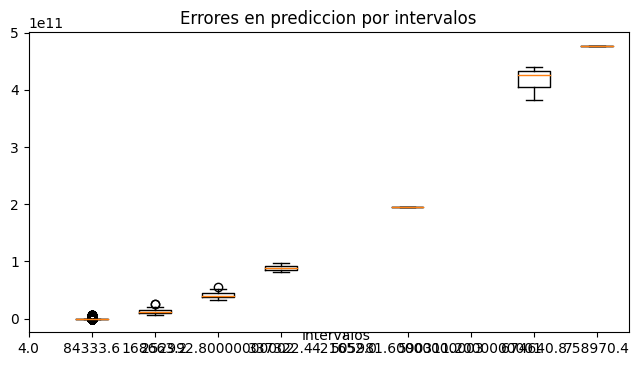

MAE TRAIN:  3395.3182912399707
MSE TRAIN:  12467.063609772074
R2 TRAIN:  -0.08077362786643838
MAE TEST:  3395.3216456422406
MSE TEST:  12253.046192428406
R2 TEST:  -0.09516296205124752



In [25]:
#Hacemos un cross val para la busqueda de hyper parametros y elegimos un modelo
from sklearn.model_selection import cross_validate

df_msas_tr = pd.DataFrame()
df_mses_tr = pd.DataFrame()
df_r2_tr = pd.DataFrame()

df_msas_te = pd.DataFrame()
df_mses_te = pd.DataFrame()
df_r2_te = pd.DataFrame()

models = []

alphas = [0.001, 0.01, 0.05, 0.1, 0.15, 1]

models.append(['LR ', LinearRegression()]) 
models.append(['Modelo MEAN ', 0]) 

for alp in alphas:
  models.append(['SGD ' + str(alp) + ' ', SGDRegressor(alpha = alp, max_iter = 5000, loss = 'huber', learning_rate = 'optimal', random_state = 0)]) 

for model in models:
  print("************ ", model[0], " ************")
  scores_msa_tr, scores_mse_tr, scores_r2_tr, score_msa_tes, scores_mse_tes, scores_r2_tes = own_cv(X_train_pca, y_train_tr, model)

  df_msas_tr = pd.concat([df_msas_tr, pd.DataFrame(scores_msa_tr)], axis = 1)
  df_mses_tr = pd.concat([df_mses_tr, pd.DataFrame(scores_mse_tr)], axis = 1)
  df_r2_tr = pd.concat([df_r2_tr, pd.DataFrame(scores_r2_tr)], axis = 1)

  df_msas_te = pd.concat([df_msas_te, pd.DataFrame(score_msa_tes)], axis = 1)
  df_mses_te = pd.concat([df_mses_te, pd.DataFrame(scores_mse_tes)], axis = 1)
  df_r2_te = pd.concat([df_r2_te, pd.DataFrame(scores_r2_tes)], axis = 1)

  print()

#### <font color='blue'>7)  Selección de la mejor hipótesis para el problema. Discuta el enfoque seguido y el criterio de selección usado. ¿Cúal es su error $E_{out}$? 1 punto.

Para ver con cual modelo nos quedamos vamos a hacer un plot de como actuan tanto en train como en test para cada una de las métricas que vamos a usar MSE,MAE y R2 y nos quedaremos con el que mejor desarrollo tenga sobre el papel en estas métricas. Para ello haremos unos gráficos con los datos que hemos recopilado anteriormente en la validación cruzada.

In [26]:
df_to_plot_tr = pd.DataFrame([df_msas_tr.median().values, df_mses_tr.median().values, df_r2_tr.median().values])
df_to_plot_te = pd.DataFrame([df_msas_te.median().values, df_mses_te.median().values, df_r2_te.median().values])

model_cols = []
for model in models:
  model_cols.append(model[0])

df_to_plot_te.columns = df_to_plot_tr.columns = model_cols
df_to_plot_te.index = df_to_plot_tr.index = ["MAE", "MSE", "R2"]


In [27]:
import matplotlib.pyplot as plt
import numpy as np

def plot_performance(df_metrics, name):
  x = np.arange(df_metrics.shape[0])  # the label locations
  width = 0.10  # the width of the bars
  multiplier = 0

  dict_metrics = df_metrics.to_dict('list')

  fig, ax = plt.subplots(figsize=(28,12))

  for attribute, measurement in dict_metrics.items():
      #print(attribute, "-"+measurement+"-")
      offset = width * multiplier
      rects = ax.bar(x + offset, np.round(np.array(measurement),2), width, label=attribute)
      ax.bar_label(rects, padding=3)
      multiplier += 1

  # Add some text for labels, title and custom x-axis tick labels, etc.
  ax.set_ylabel('Value')
  ax.set_title('Performance in ' + name)
  ax.set_xticks(x + width * 3.5, df_metrics.index)
  ax.legend(loc='upper left', ncols=3)
  ax.set_ylim([0, 13000])

  plt.show()

A continuación vamos a ver un gráfico de los valores obtenidos de media por cada uno de nuestros modelos en la cross_validation para cada una de las metricas.

A la izquierda tendremos la métrica MAE a continuación la metrica MSE y a la derecha del todo la métrica R2.

Cada una de las barritas es un modelo que hemos entrenado (En el caso de SGD el número a la derecha es el alpha utilizado como parámetro que es el factor en el que aplicará la regularización).

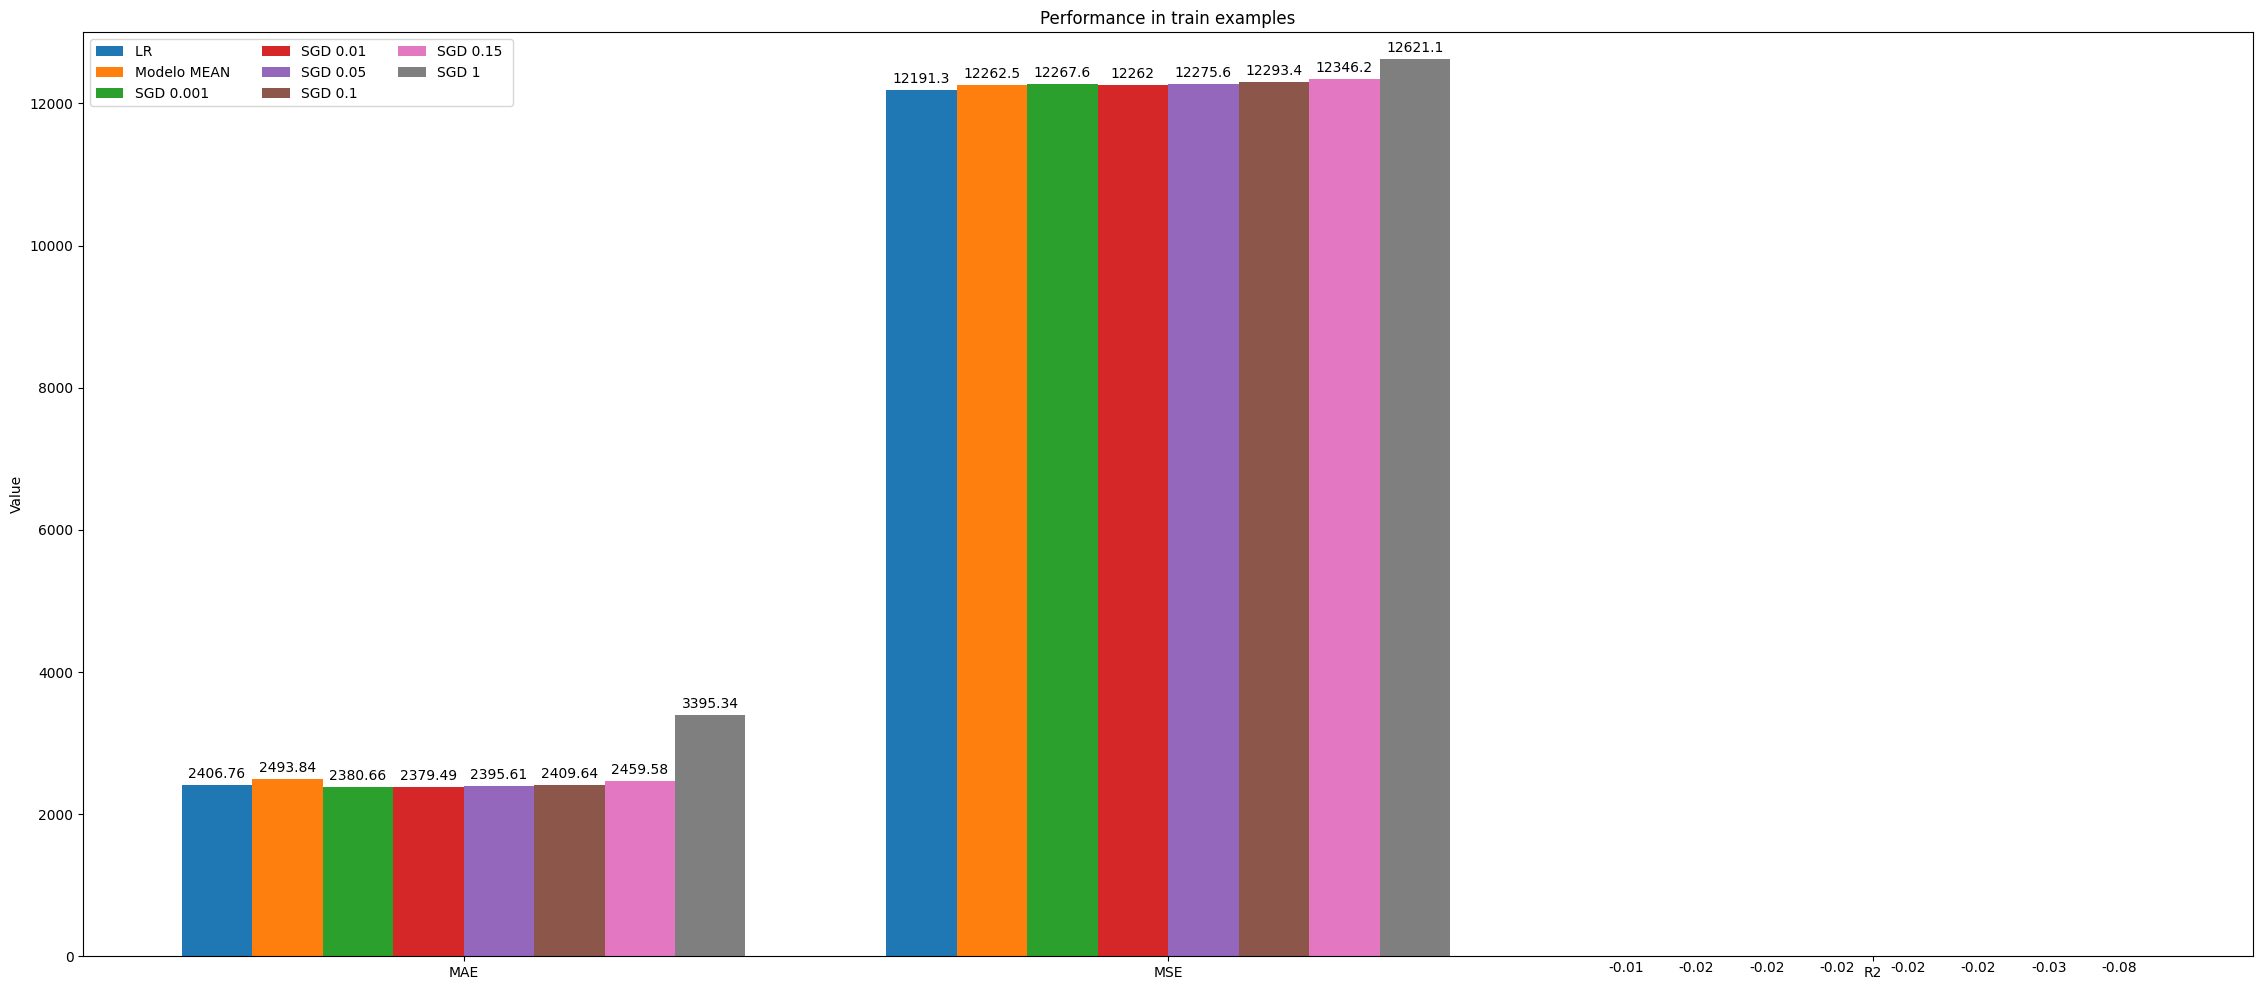

In [28]:
plot_performance(df_to_plot_tr , "train examples")

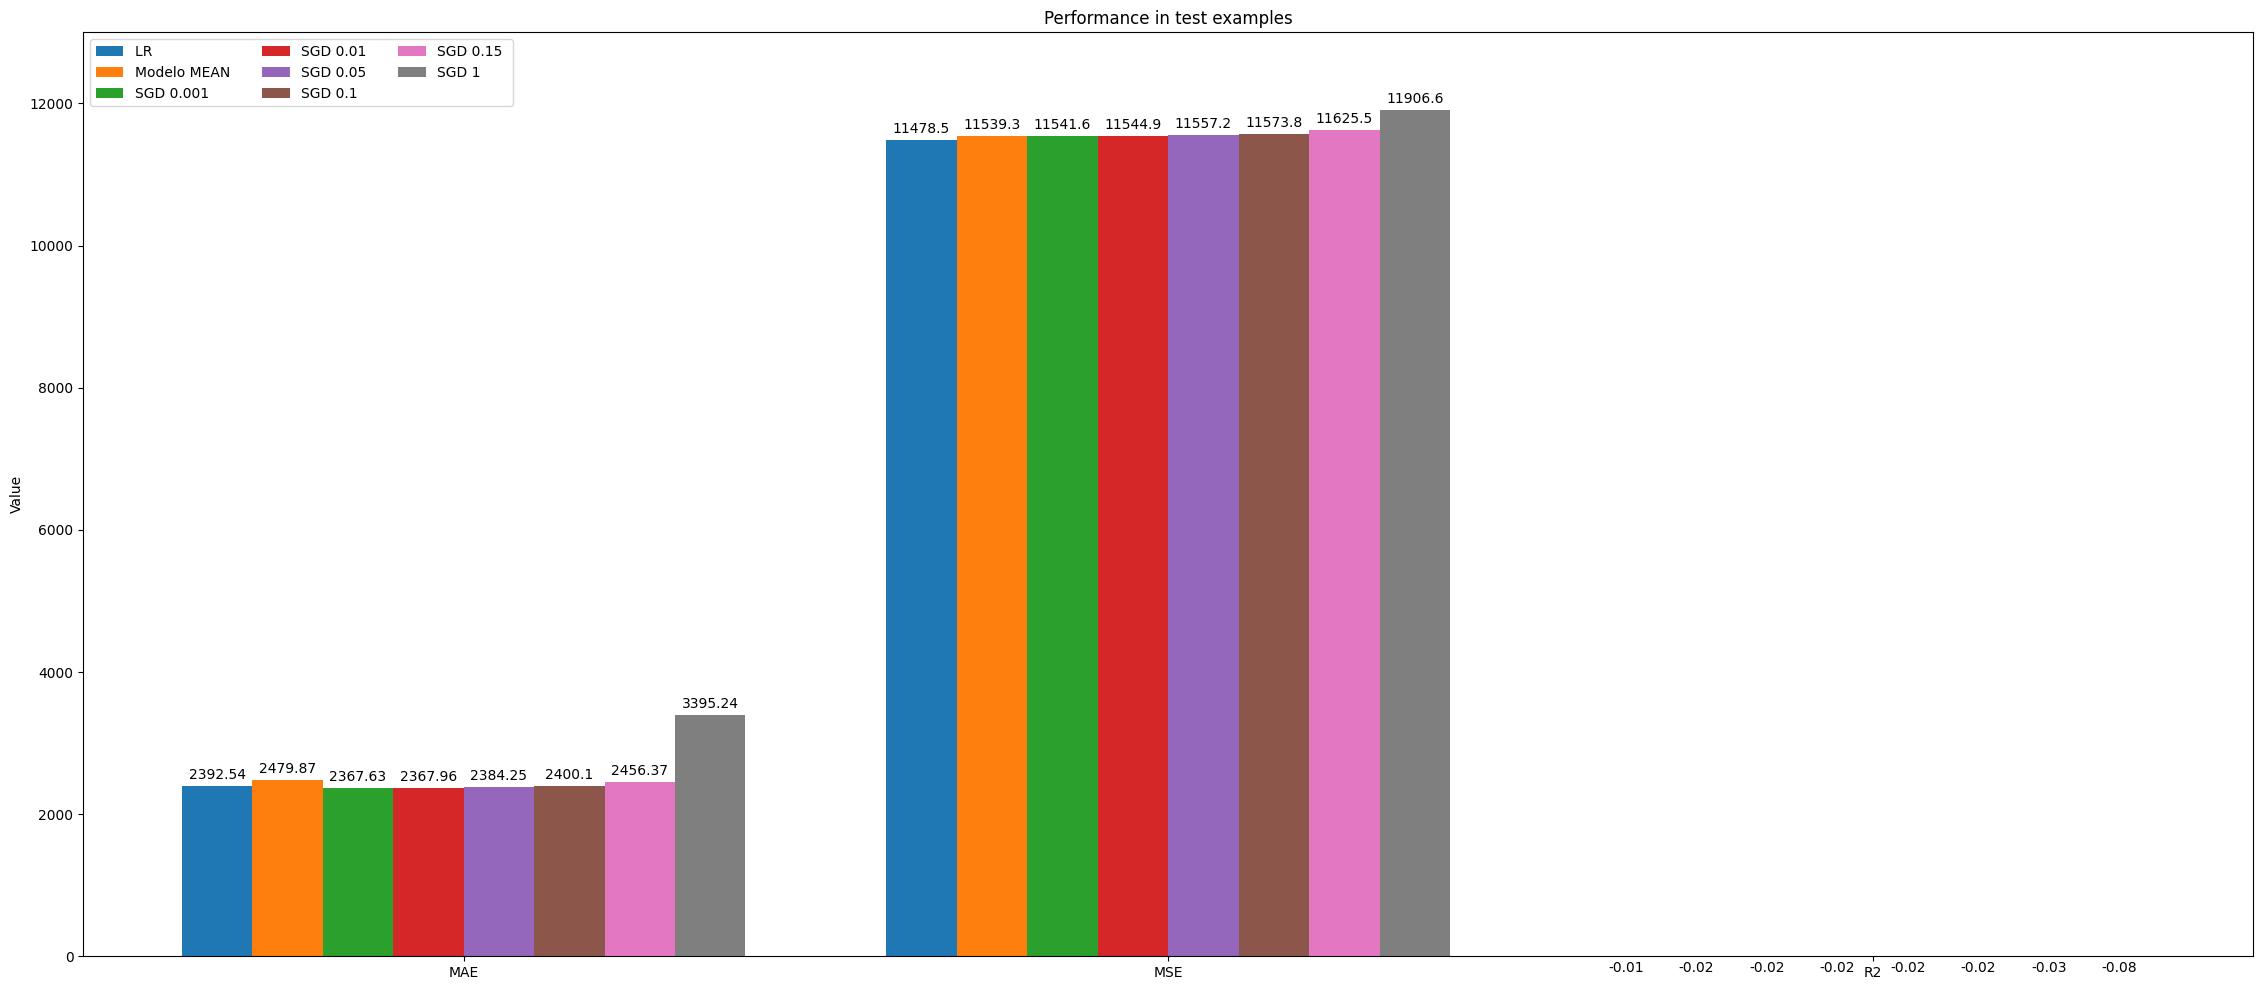

In [29]:
plot_performance(df_to_plot_te, "test examples")

Como podemos ver, en cuanto a MSE no se pueden apreciar grandes diferencias al igual que con MAE y en cuanto a la métrica R2 vemos que es muy pobre por lo que mi elección la basaré sobre el MAE y como podemos ver en esta métrica el mejor modelo es el SGDRegressor con alpha 0.001 por lo que a partir de ahora trabajaremos con él.
Todos funcionan práticamente entre 50-100 unidades mejor excepto el último SGDRegressor que es el que actúa con alpha 1. 

In [32]:
df_to_plot_te

,LR,Modelo MEAN,SGD 0.001,SGD 0.01,SGD 0.05,SGD 0.1,SGD 0.15,SGD 1
MAE,2392.536497,2479.872174,2367.632014,2367.957511,2384.249572,2400.096004,2456.370591,3395.238545
MSE,11478.545914,11539.330669,11541.558798,11544.916000,11557.159562,11573.781021,11625.508251,11906.588935
R2,-0.008239,-0.018670,-0.019064,-0.019657,-0.021821,-0.024762,-0.033942,-0.084544


La estimación de Eout que podríamos dar para este problema son estos mismos valores que tenemos encima de las barras por lo cual para nuestro modelo escogido:

In [39]:
print("E_out MSA:", df_to_plot_te['SGD 0.001 '].loc['MAE'])

E_out MSA: 2367.632013535851


In [40]:
print("E_out MSE:", df_to_plot_te['SGD 0.001 '].loc['MSE'])

E_out MSE: 11541.55879800517


#### <font color='blue'>8)  Construya las curvas de aprendizaje del modelo, y discuta la calidad del ajuste obtenido a la vista de la conducta de dichas curvas. 0.5 puntos. 

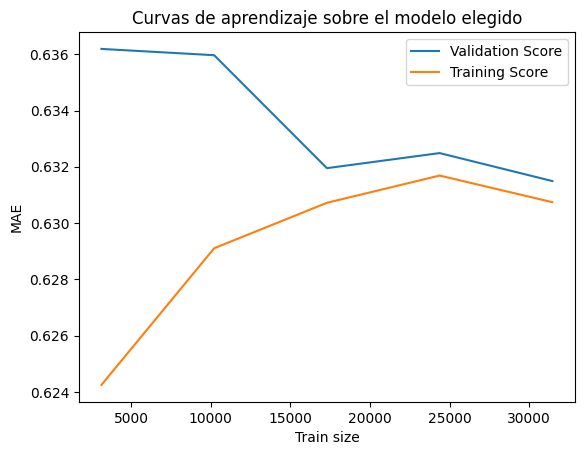

In [30]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(SGDRegressor(alpha = 0.01, max_iter = 5000, loss = 'huber', learning_rate = 'optimal', random_state = 0), 
                                                                      X_train_pca, y_train_tr, cv=15, scoring = 'neg_mean_absolute_error', random_state=42)

plt.title("Curvas de aprendizaje sobre el modelo elegido")
plt.plot(train_sizes,np.mean(-test_scores,axis=1), label = "Validation Score")
plt.plot(train_sizes,np.mean(-train_scores,axis=1), label = "Training Score")
plt.ylabel("MAE")
plt.xlabel("Train size")
plt.legend()

Como vemos en la gráfica conforme vamos teniendo más datos el error de validación se va acercando cada vez más al de entrenamiendo llegando a una convergencia.

#### <font color='blue'>9)  Suponga ahora que Ud. debe realizar este ajuste para una empresa que le ha proporcionado los datos, sin distinción entre training y test. ¿Cúal sería el mejor modelo que les propondría, y qué error  $E_{out}$ les diría que tiene? Justifique todas las decisiones. 0.5 puntos. 

Lo que haría es lo que hemos ido realizando durante la práctica tal cual. El mejor modelo lo obtendriamos a partir de la validación cruzada ya que esta nos da una estimación del posible Eout a partir del Eval.

Una vez elegido el mejor modelo usando la validación cruzada es coger ese modelo y entrenarlo con todos los datos disponibles, de esta forma ya si que estaría preparado para mandarselo a la empresa por lo cuál es lo que vamos a hacer a continuación.

Vamos a entrenar al modelo con todo el train set y lo que haremos será utilizar por primera vez la parte de test para estimar cuál es el E_out que podríamos decirle a la empresa que tiene.

In [31]:
model = SGDRegressor(alpha = 0.01, max_iter = 5000, loss = 'huber', learning_rate = 'optimal', random_state = 0)
model.fit(X_train_pca, y_train_tr)
pred = model.predict(X_test_pca)

print("E_out MAE :", MAE(np.exp(y_test_tr), np.exp(pred)))


E_out MAE : 2358.3032527978094


Esto es para tener una referencia del Eout pero si de verdad se lo tuviesemos que pasar a la empresa y el conjunto de datos que nos dieron es el total de datos que tenemos tendriamos que entrenarlo con todo sin hacer particion de test y train ya que como dicen las curvas cuantos más datos para entrenar tiene el modelo de mejor forma desempeña su trabajo.

Si entrenamos y validamos con los mismos datos, es decir, si utilizamos los mismos datos para el entrenamiento y la validación, nuestra estimación del error sería optimista.

Esto se debe a que el modelo ya ha visto los datos utilizados en la validación durante el entrenamiento el modelo podría aprender patrones específicos de los datos de entrenamiento y que tuviese un gran overfitting, lo que puede hacer que parezca que el modelo se desempeña muy bien en la validación. Para evitar esto es que usamos la validación cruzada y dividimos el conjunto en distintos folds de entrenamiento y test.

Las distintas etapas por las que hay que pasar para resolver un problema de aprendizaje automático viene muy bien representado por el proceso KDD que se basa en la idea de descubrir conocimiento útil y significativo a partir de grandes conjuntos de datos. Implica una serie de etapas interrelacionadas, que incluyen:

Selección de datos: Identificar y obtener los datos relevantes para el problema en cuestión.

Preprocesamiento de datos: Realizar operaciones de limpieza, transformación y reducción de datos para mejorar su calidad y utilidad.

Transformación de datos: Convertir los datos en una forma adecuada para su posterior análisis y modelado.

Minería de datos: Aplicar técnicas de aprendizaje automático, estadísticas y otras técnicas de análisis de datos para descubrir patrones, relaciones o conocimientos interesantes en los datos.

Evaluación de patrones: Evaluar la calidad y la importancia de los patrones descubiertos.

Presentación del conocimiento: Comunicar y presentar los resultados del análisis de datos a los usuarios finales de manera comprensible y útil.

El modelo KDD es un enfoque generalizado para descubrir conocimiento a partir de datos y puede incluir el uso de varios modelos de aprendizaje automático en diferentes etapas del proceso. Se enfoca en la identificación de patrones y relaciones ocultas en los datos para generar información útil y valiosa para la toma de decisiones y la solución de problemas.